# openCV

## Install openCV

In [1]:
!pip install opencv_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 MB 28.8 MB/s eta 0:00:0000:0100:01


## import openCV

In [1]:
import cv2

In [2]:
cv2.version.opencv_version

'4.6.0.66'

## Load image data

In [3]:
imagefile = "./image/lena.jpg"

## check shape
+ color

In [3]:
img = cv2.imread(imagefile)
print(img.shape)
# 가로, 세로, 컬러

(512, 512, 3)


+ gray

In [5]:
# gray
img2 = cv2.imread(imagefile, 0)
print(img2.shape)

(512, 512)


## show data
> ##### MAC은 실행을 멈출 수 없으며, 창을 끌 수도 없다.

In [ ]:
cv2.startWindowThread()
cv2.imshow('lena color', img)
cv2.imshow('lena gray', img2)
cv2.waitKey()
cv2.destroyAllWindows()



## Save Data

In [7]:
cv2.imwrite("./image/Lena.bmp", img)
cv2.imwrite("./image/Lena.png", img)
cv2.imwrite("./image/Lena2.png", img)
cv2.imwrite("./image/Lena2.jpg", img)

True

## color image display
> ##### MAC 유저는 창이 닫히지 않는 이슈를 이 코드로 해결 할 수 있다. 그러나 동영상은 불가능.

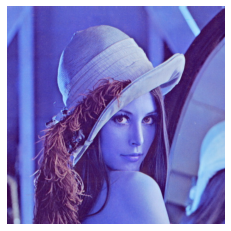

In [10]:
import matplotlib.pyplot as plt

img_bgr = cv2.imread(imagefile)
plt.axis("off")

plt.imshow(img_bgr)
plt.show()

> ###### BGR 이슈 해결

In [13]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.axis("off")

plt.imshow(img_rgb)
plt.show()

## Gray image display
> + ###### interpolation은 보간법을 뜻하며, 픽셀들의 축 위치 간격을 보정하여 이미지가 자연스러운 모양으로 보일 수 있게 하는 방법
> + ###### imshow()에서는 16가지 보간법이 있고, nearest는 가장 고해상도인 보간법

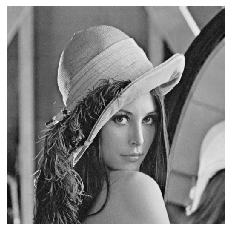

In [14]:
img_gray = cv2.imread(imagefile, cv2.IMREAD_GRAYSCALE)

plt.axis("off")
plt.imshow(img_gray, cmap="gray", interpolation='nearest')
plt.show()

## margin image save

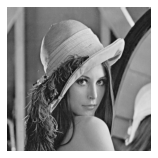

In [15]:
plt.figure(figsize=(4, 4))
plt.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5)

plt.imshow(img_gray, cmap="gray")
plt.axis('off')
plt.show()

## subplot image display
> + lena, apple, boboon, orange 이미지 2행 2열 표기
>> 해법 :
        subplot(행, 열, 인덱스) 사용
        xticks(), yticks()로 눈금 제거, plt.axis("off")로도 제거 가능.
        plt.figure(figsize=(,)) plt의 사이즈 설정
           

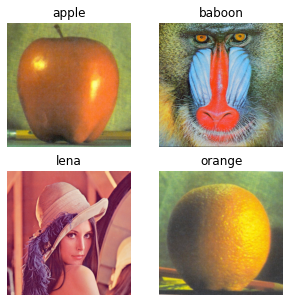

In [53]:
import numpy as np

file_apple = "./image/apple.jpg"
file_baboon = "./image/baboon.jpg"
file_orange = "./image/orange.jpg"

apple = cv2.imread(file_apple)
baboon = cv2.imread(file_baboon)
orange = cv2.imread(file_orange)

img_apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB)
img_baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)
img_orange = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)

img_list=[img_apple, img_baboon, img_rgb, img_orange]
title_list=["apple", "baboon", "lena", "orange"]

plt.figure(figsize=(5,5))

for index, i in enumerate(img_list):
    plt.subplot(2,2,index+1)
    plt.imshow(img_list[index])
    plt.title(title_list[index])
    plt.axis('off')

plt.show()

## Video input and display
> + ###### MAC은 종료되지 않는다.
+ ###### VideoCapture(0) : CPU의 카메라
<br>

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture("./image/vtest.avi")
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

while True:
    retval, frame = cap.read()
    if not retval:
        break
        
    cv2.imshow('frame', frame)
    key = cv2.waitKey(25)
    
    if key == 27:
        break
        
if cap.isOpened():
    cap.release()
    
cv2.destroyAllWindows()

## 영상 입출력과 디스플레이

* ###### 영상 입력
    * cv2.imread(filename[, flags]) → retval
* ###### 영상 파일 출력
    * cv2.imwrite(filename, img[, params]) → retval
* ###### 윈도우 생성
    * cv2.namedWindow(winname[, flags])
* ###### 윈도우 표시
    * cv2.imshow(winname, mat)
* ###### 키보드 입력 대기 
    * cv2.waitKey([, delay]) → retval
* ###### 윈도우 파괴
    * cv2.destroyWindow(winname)
    * cv2.destroyAllWindow()
* ###### 비디오 획득 객체 생성
    * cv2.VideoCapture() → <VideoCatpure object>
    * cv2.VideoCapture(filename) → <VideoCatpure object>
    * cv2.VideoCapture(device) → <VideoCatpure object>
    * device = 0, 1, …
* ###### 프레임 획득
    * cv2.VideoCapture.read([image]) → retval, image
* ###### 프레임 잡기
    * cv2.VideoCapture.grab() → retval
* ###### 프레임 획득
    * cv2.VideoCapture.retrieve([image[, channel]]) → retval, image
* ###### 비디오 획득 객체 해제
    * cv2.VideoCapture.release()
* ###### 비디오 특성 얻기
    * cv2.VideoCapture.get(propid) → retval
* ###### 비디오 특성 설정
    * cv2.VideoCapture.set(propid, value) → retval
* ###### 비디오 출력 객체 생성
    * cv2.VideoWriter([filename, fourcc, fps, frameSize[,isColor]]) → <VideoWriter object>
* ###### 비디오 파일에 이미지 출력
    * cv2.VideoWriter.write(image)
* ###### 비디오 출력 객체 해제
    * cv2.VideoWriter.release()


# 그리기

## 선 그리기
> ###### white 배경 생성 및 pt1-pt2(Red), pt1-pt3(Blue)를 잇는 선 그리기 <br><br> cv2.line(배경, 좌표1, 좌표2, BGR value, line width) 으로 선 생성 가능

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
pt1 = 0,0
pt2 = 500, 0
pt3 = 0, 500

cv2.line(img, pt1, pt2, (255,0,0), 5)
cv2.line(img, pt1, pt3, (0,0,255), 5)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 사각형 그리기
> ###### white 배경 생성 및 pt1-pt4로 사각형 그리기 <br><br> cv2.rectangle(배경, 좌표1, 좌표2, BGR value, line width)으로 사각형 생성 가능

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
pt1 = 0,0
pt4 = 400, 400

cv2.rectangle(img, pt1, pt4, (0,255,0), 2)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 선과 사각형 그리기

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
pt1 = 0,0
pt2 = 500, 0
pt3 = 0, 500
pt4 = 400, 400

cv2.line(img, pt1, pt2, (255,0,0), 5)
cv2.line(img, pt1, pt3, (0,0,255), 5)
cv2.rectangle(img, pt1, pt4, (0,255,0), 2)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## clipline
> ###### white 배경 생성 및 pt1-pt4로 사각형 그리기 <br><br> cv2.clipline(검충 하려는 직사각형 영역, 직선의 시작점, 직선의 종료점, retval, 사각형 안에 있는 선의 시작점, 사각형 안에 있는 선의 종료점)으로 사각형 생성 가능

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
pt1 = 120, 50
pt2 = 300, 500

x1, x2, y1, y2 = 100, 400, 100, 400

cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255))
cv2.line(img, pt1, pgt2, (255, 0, 0), 2)
imgRect = (x1, y1, x2-x1, y2-y1)
cv2.clipLine(imRect, pt1, pt2)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## circle
> circle() 함수로 구현 가능

In [75]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255

cx = img.shape[0]//2
cy = img.shape[1]//2

cv2.circle(img,(cx, cy), 200, (0,0,255))
cv2.circle(img,(cx, cy), 100, (0,0,255))
cv2.circle(img,(cx, cy), 10, (255,0,0))
cv2.circle(img,(cx, cy), 1, (0,0,1))


(512, 512, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Ellipse
> ellipse() 함수로 구현 가능

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255

cx = img.shape[0]//2
cy = img.shape[1]//2

cv2.ellipse(img,(cx, cy), (90, 50), 50, 50, 360, (0,0,255))
cv2.ellipse(img,(cx, cy), (90, 50), -50, 50, 360, (255,0,0))
cv2.ellipse(img,(cx, cy), (90, 50), 50, -50, 360, (0,255,0))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## Ellipse(box)
> ellipse() 함수로 구현 가능 <br> box option 이용

In [ ]:
import numpy as np
img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255

center = img.shape[0]//2, img.shape[1]//2
size = 200, 100
box = (center, size, 0)
cv2.ellipse(img, box, (255, 0, 0), 5)
box = (center, size, 45)
cv2.ellipse(img, box, (0, 0, 255), 5)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## polylines()
> 여러개의 좌표를 지정하여 다각형을 구현합니다.

In [ ]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
pts1 = np.array([[100, 200], [200, 200], [200, 100], [100, 100]])
pts2 = np.array([[300, 200], [400, 200], [400, 100]]) # 3개의 포인트 지정
cv2.polylines(img, [pts1], True, (255,0,0), 2)
cv2.polylines(img, [pts2], True, (255,0,0), 2)

pts3 = np.array([[100, 400], [200, 400], [200, 300], [100, 300]])
cv2.polylines(img, [pts3], False, (0,0,255), 2)

cv2.imshow('polylines', img )
cv2.waitKey()
cv2.destroyAllWindows()


## ellipse2Poly()

> delta각의 의하여 연결되는 선들을 이용하여 원에 가까운 다각형을 그릴 수 있다. delta를 제외한 파라미터는 elipse와 동일하다. <br> delta(각도)값이 작아질 수 록 좌표가 많아진다.

In [ ]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
ptCenter = img.shape[0]//2, img.shape[1]//2
size = 200, 100

cv2.ellipse(img, ptCenter, size, 0, 0, 360, (0,255,0))
pts1 = cv2.ellipse2Poly(ptCenter, size, 0, 0, 360, delta = 50)
cv2.polylines(img, [pts1], False, (255,0,0), 2)

cv2.ellipse(img, ptCenter, size, 90, 0, 360, (0,0,255))
pts2 = cv2.ellipse2Poly(ptCenter, size, 90, 0, 360, delta = 50)
cv2.polylines(img, [pts2], False, (0,255,0), 2)

cv2.imshow('polylines', img)
cv2.waitKey()
cv2.destroyAllWindows()

## rotated rectangle
> angle을 변경 다양한 각도로 사각형 생성

In [ ]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
x, y, size, angle = 150, 250, 100, 45

rect = ((x,y),(size,size), angle)
box = cv2.boxPoints(rect).astype(np.int32)

print('box = ', box)

r, g, b = np.random.randint(256), np.random.randint(256), np.random.randint(256

cv2.polylines(img, [box], True, (r,g,b), 2)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

box =  [[ 79 250]
 [150 179]
 [220 250]
 [150 320]]


## Utilize repeat statements

In [ ]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
x, y, size = 150, 250, 100

for angle in range(0, 90, 10) :
    rect = ((x,y),(size,size), angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    r, g, b = np.random.randint(256), np.random.randint(256), np.random.randint(256)
    cv2.polylines(img, [box], True, (r,g,b), 1)
    
print('box = ', box)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

box =  [[ 92 209]
 [190 192]
 [207 290]
 [109 307]]


## fillConvexPoly()
> 채워진 블록 다각형을 그리는 함수
## fillPoly()
> 채워진 다각형을 그리는 함수

In [ ]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255

pts1 = np.array([[100, 200], [200, 200], [200, 100], [100, 100]])
pts2 = np.array([[300,200], [400,200], [400,100]])

cv2.fillConvexPoly(img, pts1, (255,0,0))
cv2.fillPoly(img, [pts2], (0,0,255))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows() 

## fillPoly()으로 ploygon 구현
> 2개의 다각형 구현

In [ ]:
import cv2
import numpy as np

img1 = np.zeros(shape=(400, 400, 3), dtype=np.uint8)
img2 = np.zeros(shape=(400, 400, 3), dtype=np.uint8)

pt1 = np.array([[100, 100], [270, 110], [300, 330], [170, 170], [150, 250]], np.int32)

cv2.fillConvexPoly(img1, pt1, (255,0,0))
cv2.fillPoly(img2, [pt1], (0,0,255))

cv2.imshow('convex', img1)
cv2.imshow('poly', img2)
cv2.waitKey()
cv2.destroyAllWindows()

# 문자열 출력 함수

## getTextSize
> 문자열 출력 크기를 반환하는 함수

## putText
> 문자열을 출력하는 함수

In [7]:
import cv2
import numpy as np

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
text = 'OpenCV Programming.'

org = (50,100)
fontScale = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, text, org, fontScale, 1,(0,0,255))
size, baseLine = cv2.getTextSize(text, fontScale, 1, 1)

print('size = ', size)
print("baseLine= ", baseLine)

cv2.rectangle(img, org, (org[0]+size[0], org[1]-size[1]), (255,0,0))
cv2.circle(img, org, 3, (0,255,0), 2)
cv2.imshow('img', img)
cv2.waitKey(300)
cv2.destroyAllWindows()



size =  (354, 22)
baseLine=  10


# 이벤트 처리
## 키보드 이벤트 처리
### waitKey()
> OpenCV에서 키 입력을 확인하기 위한 함수

In [ ]:
import cv2
import numpy as np

width, height = 512, 512
x, y, R = 256, 256, 50
left, right, down, up = 2,0,1,3
direction = down

# 윈도우 기준 방향키 전환, 맥 적용 안됨.
while True : 
    key = cv2.waitKeyEx(1000)
    if key == 0x1B : break
    elif key == 0x270000 : direction = 0 # right
    elif key == 0x260000 : direction = 1 # down
    elif key == 0x250000 : direction = 2 # left
    elif key == 0x280000 : direction = 3 # up
        
    if direction == 0 : x+=5
    elif direction == 1 : y-=5
    elif direction == 2 : x-=5
    elif direction == 3 : y+=5
        
    if x < R : direction = 0
    if x > width - R : direction = 2
    if y < R : direction = 1
    if y > height - R : direction = 3

    img = np.zeros(shape=(width, height, 3), dtype=np.uint8) + 255
    cv2.circle(img,(x,y),R,(0,0,255),-1)
    cv2.imshow('img',img)
cv2.destroyAllWindows()


## 마우스 이벤트 처리
### cv2.setMouseCallback(windowName, callback, param=None)
> 좌클릭, 우클릭, 쉬프트 클릭별 도형 생성

In [ ]:
import cv2
import numpy as np

def on_mouse(event, x, y, flags, param) : 
    if event == cv2.EVENT_LBUTTONDOWN : 
        if flags & cv2.EVENT_FLAG_SHIFTKEY :
            cv2.rectangle(img, (x-5, y-5), (x+5, y+5), (0,255,0))
        else : 
            cv2.circle(img,(x, y), 10, (255,0,0),3)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(param[0], (x, y), 10, (0,0,255),3)
    cv2.imshow('img', param[0])
    
img = np.zeros((512, 512, 3), np.uint8) + 255

cv2.imshow('img', img)

cv2.setMouseCallback('img', on_mouse, [img])
cv2.waitKey()
cv2.destroyAllWindows()

## 트랙바 이벤트 처리
> cv2.CreateTrackbar <br> 원하는 RGB값 화면 시각화

In [ ]:
import cv2
import numpy as np


def on_change(pos) :
    global img
    r = cv2.getTrackbarPos('R', 'img')
    g = cv2.getTrackbarPos('G', 'img')
    b = cv2.getTrackbarPos('B', 'img')
    img[:] = (b,g,r)
    cv2.imshow('img', img)
    
img = np.zeros((512, 512, 3), np.uint8)
cv2.imshow('img', img)
cv2.createTrackbar('R', 'img', 0,255,on_change)
cv2.createTrackbar('G', 'img', 0,255,on_change)
cv2.createTrackbar('B', 'img', 0,255,on_change)

cv2.setTrackbarPos('R', 'img', 0)
cv2.setTrackbarPos('G', 'img', 0)
cv2.setTrackbarPos('B', 'img', 0)
cv2.waitKey()
cv2.destroyAllWindows()

## 트랙바 이미지 처리 2
> 투명도 조절

In [3]:
import cv2
import numpy as np

images1 = "./image/lena.jpg"
images2 = "./image/baboon.jpg"

img1 = 0
img2 = 0
img3 = 0

def on_change(pos) :
    n = cv2.getTrackbarPos('alpha', 'image')
    print('n=', n)
    
    alpha = n/100
    print('alpha=', alpha)
    
    img3 = np.uint8((alpha*img2 + (1-alpha) * img1))
    cv2.imshow('img', img3)
    
img1 = cv2.imread(images1)
img2 = cv2.imread(images2)
img3 = img1.copy()

cv2.imshow('image', img3)
cv2.createTrackbar('alpha', 'image', 0,100, on_change)

cv2.setTrackbarPos('alpha', 'image', 0)

cv2.waitKey()
cv2.destroyAllWindows()

# 영상 접근법
## 화소 접근 방법


In [4]:
import cv2
import numpy as np

img = cv2.imread("./image/lena.jpg")
print('img.ndm =', img.ndim)
print('img.shape =', img.shape)
print('img.dtype =', img.dtype)

img = img.astype(np.int32)
print('img.dtype =', img.dtype)

img=np.uint8(img)
print('img.dtype =', img.dtype)

img.ndm = 3
img.shape = (512, 512, 3)
img.dtype = uint8
img.dtype = int32
img.dtype = uint8


> 데이터 프레임으로 시각화

In [28]:
import pandas as pd
img = cv2.imread('./image/Lena2.jpg', 0)
df = pd.DataFrame(img)
df

0    1    2    3    4    5    6    ...  505  506  507  508  509  510  511
0    163  162  161  160  163  156  164  ...  166  167  173  173  168  156  129
1    162  162  162  161  164  156  163  ...  165  163  169  174  173  157  125
2    162  163  163  161  163  156  164  ...  166  168  169  169  169  156  127
3    162  164  163  160  163  156  164  ...  161  171  171  170  170  158  132
4    164  164  162  159  162  156  164  ...  160  170  172  175  172  154  124
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
507   52   50   55   48   52   51   51  ...   77   84   88   95   97   93   91
508   49   46   51   44   51   49   49  ...   82   90   94  100  102   98   95
509   43   41   51   46   55   50   49  ...   85   92   96  101  102  100   99
510   41   42   55   50   57   49   49  ...   93   98  104  104  104  105  107
511   42   44   58   50   53   45   48  ...   93   98  104  103  101  105  109

[512 rows x 512 columns]

### 타입을 변경하여 이미지 변경 유무 확인

In [ ]:
import cv2
import numpy as np

img = cv2.imread("./image/lena.jpg", cv2.IMREAD_GRAYSCALE)
img = img.flatten()
img = img.reshape(512, 512)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 위치의 밝기값 조정

In [3]:
img = cv2.imread("./image/lena.jpg", 0)
img_bgr = cv2.imread()
img[30, 20]

161

## ROI설정
###  - 슬라이싱
### - 마우싱

### 특정한 영역 display
> 가로 세로를 반으로 줄인 영역

In [ ]:
import numpy as np
import cv2
img = cv2.imread('./image/Lena2.jpg', cv2.IMREAD_GRAYSCALE)

(h, w) = img.shape
print(h, w)
(cy, cx) = (h//2, w//2)
print(cy, cx)

roi = img[0:cy, 0:cx]

cv2.imshow('img', img)
cv2.imshow('ROI', roi)
cv2.waitKey()
cv2.destroyAllWindows()

512 512
256 256


### 특정한 영역 display
> 얼굴 영역만 추출

In [ ]:
import numpy as np
import cv2
img = cv2.imread('./image/Lena2.jpg', cv2.IMREAD_GRAYSCALE)

roi = img[180:400, 180:400]

cv2.imshow('img', img)
cv2.imshow('ROI', roi)
cv2.waitKey()
cv2.destroyAllWindows()

## 영상 접근법
### - 원본의 영상을 유지하고 복사
> 레나의 얼굴을 검정색으로 마스크한 상태로 display

In [7]:
import numpy as np
import cv2

src = cv2.imread('./image/Lena2.jpg', cv2.IMREAD_GRAYSCALE)
dst = src.copy()

dst[180:400, 180:400] = 0

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 흑백 레나 영상 밝기값 복사

In [ ]:
import numpy as np
import cv2

src = cv2.imread('./image/lena2.jpg', cv2.IMREAD_GRAYSCALE)

dst = np.zeros([512, 512, 3])

dst[:, :, 0] = src.copy()
dst[:, :, 1] = src.copy()
dst[:, :, 2] = src.copy()

dst[180:400, 180:400] = [255, 255, 255]

cv2.imshow('dst', np.uint8(dst))
cv2.waitKey()
cv2.destroyAllWindows()

## R 값 수정

In [ ]:
import numpy as np
import cv2

src = cv2.imread('./image/lena2.jpg', cv2.IMREAD_GRAYSCALE)

dst = np.zeros([512, 512, 3])

dst[:, :, 0] = src.copy()
dst[:, :, 1] = src.copy()
dst[:, :, 2] = src.copy()

dst[180:400, 180:400] = [255, 255, 255]

for x in range(len(dst[0])):
    for y in range(len(dst[:,0])):
        dst[x,y] = [dst[x, y,0], dst[x, y, 1], np.random.randint(0,255)]
        
cv2.imshow('dst', np.uint8(dst))
cv2.waitKey()
cv2.destroyAllWindows()

## 컬러 영상 채널 분리와 병합
> 채널 분리 cv2.split() <br>
> 채널 병합 cv2.merge() <br><br>
> YCbCr의 y는 휘도 성분, cb와 cr은 색차 성분 <br>
> HSV = Hue(색상), Saturation(채도), 명도(Value)

In [ ]:
import numpy as np
import cv2

src = cv2.imread('./image/lena.jpg')

b, g, r = cv2.split(src)

cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2

src = cv2.imread('./image/lena.jpg')

b, g, r = cv2.split(src)
zeros = np.zeros([src.shape[0], src.shape[1]], dtype="uint8")

b = cv2.merge([b, zeros, zeros])
g = cv2.merge([zeros, g, zeros])
r = cv2.merge([zeros, zeros, r])

cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
import numpy as np
import cv2


src = cv2.imread('./image/lena.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.imshow('src', src)
cv2.imshow('gray', gary)
cv2.imshow('yCrCv', yCrCv)
cv2.imshow('hsv', hsv)
cv2.waitKey()
cv2.destroyAllWindows()

## 영상 기하 변환
> cv2.resize <br>
> 영상의 크기 변환 - 확대 축소 <br>
> cv2.rotate <br>
> 영상을 90도 간격으로 회전 시킴 <br>

In [ ]:
src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.resize(src, dsize=(320, 240))
dst2 = cv2.resize(src, dsize=(0, 0), fx=1.5, fy=1.2)

cv2.imshow("dst", dst)
cv2.imshow("dst2", dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)
dst2 = cv2.rotate(src, cv2.ROTATE_180)
dst3 = cv2.rotate(src, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2.imshow("dst", dst)
cv2.imshow("dst2", dst2)
cv2.imshow("dst3", dst3)
cv2.waitKey()
cv2.destroyAllWindows()

## 변환 함수
> cv2.getRotationMatrix2D() <br>
> cv2.warpAffine()


In [ ]:
src = cv2.imread('./image/lena.jpg')

rows, cols, channels = src.shape

M1 = cv2.getRotationMatrix2D((rows/2, cols/2), 45, 0.5)
M2 = cv2.getRotationMatrix2D((rows/2, cols/2), 45, 1.5)
dst1 = cv2.warpAffine(src, M1, (rows, cols))
dst2 = cv2.warpAffine(src, M2, (rows, cols))

cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.imshow("dst3", dst3)
cv2.waitKey()
cv2.destroyAllWindows()

## 영상 기하 변환
> imutils (많이 사용)

In [8]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25836 sha256=7304f5b5eb8ad0b07ad84350a72260a6ea5992629d19a8bc41aff0be374d9336
  Stored in directory: /Users/werther/Library/Caches/pip/wheels/4b/a5/2d/4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [9]:
import imutils

> imutils로 x + 10, y + 30 이동

In [ ]:
src = cv2.imread('./image/lena.jpg')

rows, cols, channels = src.shape

src=imutils.translate(src, 10, 30)

cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()

> center 중심 10도 만큼 회전

In [ ]:
src = cv2.imread('./image/lena.jpg')

rows, cols, channels = src.shape

src = imutils.rotate(src, angle=10, center=rows/2, cols/2)

cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()

> 사이즈 수정

In [ ]:
src = cv2.imread('./image/lena.jpg')

rows, cols, channels = src.shape

src = imutils.resize(src, width=10, height=10)

cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()

## 사칙연산
> 영상과 영상을 사칙연산한다. np+np <br>
> add, addWeighted, subract, scaleAdd, multiply, divide.. <br>
> addWeighted 가 많이 사용

In [ ]:
src1 = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros(shape=(512, 512), dtype=np.uint8) + 100

dst1 = src1 + src2
dst2 = cv2.add(src1, src2)

cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src1 = cv2.imread('./image/lena.jpg')
src2 = cv2.imread('./image/baboon.jpg')

dst = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 임계값을 이용한 영상변환
> cv2.THRESH_BINARY <br>
> cv2.THRESH_BINARY_INV <br>
> cv2.THRESH_TRUNC <br>
> cv2.THRESH_TOZERO <br>
> cv2.THRESH_TOZERO_INV

In [ ]:
src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)

ret, dst = cv2.threshold(src, 
                         120, ## 임계치
                         255, 
                         cv2.THRESH_BINARY)
print('ret=', ret)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

ret= 120.0


In [ ]:
src = cv2.imread('./image/cup.png')

ret, dst = cv2.threshold(src, 
                         170,
                         255, 
                         cv2.THRESH_BINARY_INV)
print('ret=', ret)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

## opencv logo에서 logo만 검정색으로 추출

In [ ]:
src = cv2.imread('./image/opencv_logo.png', cv2.IMREAD_GRAYSCALE)

ret, dst = cv2.threshold(src, 
                         230,
                         255, 
                         cv2.THRESH_BINARY)
print('ret=', ret)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

src1 = cv2.imread('./image/lena.jpg', 0)
src2 = np.zeros(shape=(512, 512), dtype=np.uint8) +255

dst1 = 255 - src1
print(src1[0, :10])
print(dst1[0, :10])

dst2 = cv2.subtract(src2, src1)
print(src1[0, :10])
print(dst2[0, :10])

dst3 = cv2.compare(dst1, dst2, cv2.CMP_EQ)
print(src1[0, :10])
print(dst3[0, :10])
dst4 = cv2.compare(dst1, dst2, cv2.CMP_NE)
print(src1[0, :10])
print(dst4[0, :10])
dst5 = cv2.compare(dst1, dst2, cv2.CMP_GT)
print(src1[0, :10])
print(dst5[0, :10])
dst6 = cv2.compare(dst1, dst2, cv2.CMP_GE)
print(src1[0, :10])
print(dst6[0, :10])
dst7 = cv2.compare(dst1, dst2, cv2.CMP_LT)
print(src1[0, :10])
print(dst7[0, :10])
dst8 = cv2.compare(dst1, dst2, cv2.CMP_LE)
print(src1[0, :10])
print(dst8[0, :10])

cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.imshow("dst3", dst3)
cv2.imshow("dst4", dst4)
cv2.imshow("dst5", dst5)
cv2.imshow("dst6", dst6)
cv2.imshow("dst7", dst7)
cv2.imshow("dst8", dst8)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

src1 = cv2.imread('./image/lena.jpg', 0)
src2 = np.zeros(shape=(512, 512), dtype=np.uint8) +255

dst1 = 255 - src1
print(src1[0, :10])
print(dst1[0, :10])

dst2 = cv2.subtract(src2, src1)
print(src1[0, :10])
print(dst2[0, :10])

dst3 = cv2.compare(src1, dst1, cv2.CMP_EQ)
print(src1[0, :10])
print(dst3[0, :10])
dst4 = cv2.compare(src1, dst1, cv2.CMP_NE)
print(src1[0, :10])
print(dst4[0, :10])
dst5 = cv2.compare(src1, dst1, cv2.CMP_GT)
print(src1[0, :10])
print(dst5[0, :10])
dst6 = cv2.compare(src1, dst1, cv2.CMP_GE)
print(src1[0, :10])
print(dst6[0, :10])
dst7 = cv2.compare(src1, dst1, cv2.CMP_LT)
print(src1[0, :10])
print(dst7[0, :10])
dst8 = cv2.compare(src1, dst1, cv2.CMP_LE)
print(src1[0, :10])
print(dst8[0, :10])

cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.imshow("dst3", dst3)
cv2.imshow("dst4", dst4)
cv2.imshow("dst5", dst5)
cv2.imshow("dst6", dst6)
cv2.imshow("dst7", dst7)
cv2.imshow("dst8", dst8)
cv2.waitKey()
cv2.destroyAllWindows()


## minMaxLoc(src)
> 행렬의 최솟값, 최댓값을 찾는 minMaxLoc() 함수입니다. 이 함수는 최솟값, 최댓값이 있는 좌표 정보도 함께 알아낼 수 있습니다.

In [3]:
import cv2
import numpy as np

src = cv2.imread('./image/lena.jpg', 0)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)

print('- src')
print('- minVal : ', minVal)
print('- maxVal : ', maxVal)
print('- minLoc : ', minLoc)
print('- maxLoc : ', maxLoc)
print('- src[minLoc[1], minLoc[0]] : ', src[minLoc[1], minLoc[0]])
print('- src[maxLoc[1], maxLoc[0]] : ', src[maxLoc[1], maxLoc[0]])

- src
- minVal :  18.0
- maxVal :  247.0
- minLoc :  (265, 198)
- maxLoc :  (116, 273)
- src[minLoc[1], minLoc[0]] :  18
- src[maxLoc[1], maxLoc[0]] :  247


## cv2.normalize
> dst = cv2.normalize(src, dst, alpha, beta, type_flag) <br>
src: 정규화 이전의 데이터<br>
dst: 정규화 이후의 데이터<br>
alpha: 정규화 구간 1<br>
beta: 정규화 구간 2, 구간 정규화가 아닌 경우 사용 안 함<br>
type_flag: 정규화 알고리즘 선택 플래그 상수

In [10]:
import cv2
import numpy as np

src = cv2.imread('./image/lena.jpg', 0)

dst = cv2.normalize(src, None, 100, 255, cv2.NORM_MINMAX)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dst)

print('- src')
print('- minVal : ', minVal)
print('- maxVal : ', maxVal)
print('- minLoc : ', minLoc)
print('- maxLoc : ', maxLoc)
print('- src[minLoc[1], minLoc[0]] : ', src[minLoc[1], minLoc[0]])
print('- src[maxLoc[1], maxLoc[0]] : ', src[maxLoc[1], maxLoc[0]])

- src
- minVal :  100.0
- maxVal :  255.0
- minLoc :  (265, 198)
- maxLoc :  (116, 273)
- src[minLoc[1], minLoc[0]] :  18
- src[maxLoc[1], maxLoc[0]] :  247


## 직접 정규화

In [ ]:
import cv2
import numpy as np

src = cv2.imread('./image/lena.jpg', 0)

dst2 = ((src - np.min(src)) / (np.max(src)-np.min(src))) * 255

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dst2)

print('- src')
print('- minVal : ', minVal)
print('- maxVal : ', maxVal)
print('- minLoc : ', minLoc)
print('- maxLoc : ', maxLoc)
print('- src[minLoc[1], minLoc[0]] : ', src[minLoc[1], minLoc[0]])
print('- src[maxLoc[1], maxLoc[0]] : ', src[maxLoc[1], maxLoc[0]])

cv2.imshow("dst2", np.uint(dst2))
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
dst = cv2.normalize(src, None, 100, 255, cv2.NORM_MINMAX)
dst1 = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
dst2 = ((src - np.min(src)) / (np.max(src) - np.min(src))) * 255
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(dst)
min_val1, max_val1, min_loc1, max_loc1 = cv2.minMaxLoc(dst1)
print(minVal, maxVal)
print(min_val, max_val)
print(min_val1, max_val1)
print(minLoc, maxLoc)
print(min_loc, max_loc)
print(min_loc1, max_loc1)
cv2.imshow(‘src’, src)
cv2.imshow(‘dst’, dst)
cv2.imshow(‘dst1’, dst1)
cv2.imshow(‘dst2’, np.uint8(dst2))
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 자동 임계값 계산
> cv2.THRESH_BINARY : 삼각 알고리즘을 이용한 자동 임계값 설정 <br> 
> cv2.OTSU : otsu알고리즘을 이용한 임계값 설정 <br>

In [ ]:
import cv2
import numpy as np

src = cv2.imread('./image/lena.jpg', 0)

ret, dst = cv2.threshold(src, 200, 255, cv2.THRESH_BINARY)
ret2, dst2 = cv2.threshold(src, 200, 255, cv2.THRESH_OTSU)
ret3, dst3 = cv2.threshold(src, 200, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
print('ret=', ret)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

In [ ]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread('images/noise.png',0)

# global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img,(5,5),0)

ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding", 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in xrange(3):
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+2), plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+3), plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

## 자동 임계값 계산
> Mean방식은 지정된 영역의 이웃 픽셀의 평균으로 threshold를 결정하는 방법 <br>
> Gaussian 방식은 가우시안 분포에 따른 가중치의 합으로 threshold를 결정하는 방법<br><br>
Parameters:<br>
• src – grayscale image<br>
• maxValue – 임계값<br>
• adaptiveMethod – thresholding value를 결정하는 계산 방법(mean, gaussian 방식)<br>
• thresholdType – threshold 방법<br>
• blockSize – thresholding을 적용할 영역 사이즈, 홀수(3, 5, 7, ...)<br>


In [8]:
import cv2
import numpy as np

src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)

ret, dst = cv2.threshold(src, 200, 255, cv2.THRESH_BINARY)
ret4, dst4 = cv2.threshold(src, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('global threshold=', ret4)

dst5 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 0)
dst6 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 0)


d_list = [dst, dst4, dst5, dst6]

for i in d_list : 
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(i)
    print('\n- src')
    print('- minVal : ', minVal)
    print('- maxVal : ', maxVal)
    print('- minLoc : ', minLoc)
    print('- maxLoc : ', maxLoc)
    print('- src[minLoc[1], minLoc[0]] : ', src[minLoc[1], minLoc[0]])
    print('- src[maxLoc[1], maxLoc[0]] : ', src[maxLoc[1], maxLoc[0]])

cv2.imshow('dst', dst)
cv2.imshow('dst4', dst4)
cv2.imshow('dst5', dst5)
cv2.imshow('dst6', dst6)
cv2.waitKey()
cv2.destroyAllWindows()

global threshold= 117.0

- src
- minVal :  0.0
- maxVal :  255.0
- minLoc :  (0, 0)
- maxLoc :  (406, 0)
- src[minLoc[1], minLoc[0]] :  163
- src[maxLoc[1], maxLoc[0]] :  208

- src
- minVal :  0.0
- maxVal :  255.0
- minLoc :  (63, 0)
- maxLoc :  (0, 0)
- src[minLoc[1], minLoc[0]] :  105
- src[maxLoc[1], maxLoc[0]] :  163

- src
- minVal :  0.0
- maxVal :  255.0
- minLoc :  (5, 0)
- maxLoc :  (0, 0)
- src[minLoc[1], minLoc[0]] :  157
- src[maxLoc[1], maxLoc[0]] :  163

- src
- minVal :  0.0
- maxVal :  255.0
- minLoc :  (2, 0)
- maxLoc :  (0, 0)
- src[minLoc[1], minLoc[0]] :  161
- src[maxLoc[1], maxLoc[0]] :  163


## 넘파이 히스토그램 생성

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = np.array([[0,0,0,0],
               [1,1,3,5],
               [6,1,1,3],
               [4,3,1,7]], dtype=np.uint8)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0,8])
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[8], ranges=[0,8])
hist3 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0,4])

print('hist1 : ', hist1)
print('hist2 : ', hist2)
print('hist3 : ', hist3)

hist1 :  [[9.]
 [3.]
 [2.]
 [2.]]
hist2 :  [[4.]
 [5.]
 [0.]
 [3.]
 [1.]
 [1.]
 [1.]
 [1.]]
hist3 :  [[4.]
 [5.]
 [0.]
 [3.]]


## 레나 히스토그램 생성

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[32], ranges=[0,256])
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0,256])

print('hist1 : ', hist1)
print('hist2 : ', hist2)

hist1 :  [[0.0000e+00]
 [0.0000e+00]
 [4.0000e+00]
 [4.5700e+02]
 [3.9840e+03]
 [1.2842e+04]
 [1.5364e+04]
 [9.7330e+03]
 [6.6300e+03]
 [6.9730e+03]
 [7.5490e+03]
 [9.9030e+03]
 [1.4938e+04]
 [1.2189e+04]
 [1.1516e+04]
 [1.5556e+04]
 [1.7769e+04]
 [1.7279e+04]
 [1.8434e+04]
 [2.0473e+04]
 [1.2963e+04]
 [9.8330e+03]
 [7.7490e+03]
 [5.4350e+03]
 [7.0610e+03]
 [7.3390e+03]
 [7.2600e+03]
 [2.4070e+03]
 [4.7200e+02]
 [2.8000e+01]
 [4.0000e+00]
 [0.0000e+00]]
hist2 :  [[0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [1.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [1.000e+00]
 [2.000e+00]
 [4.000e+00]
 [8.000e+00]
 [1.700e+01]
 [2.400e+01]
 [5.600e+01]
 [8.200e+01]
 [1.100e+02]
 [1.560e+02]
 [2.010e+02]
 [2.870e+02]
 [3.380e+02]
 [4.240e+02]
 [5.210e+02]
 [6.130e+02]
 [7.080e+02]
 [8.920e+02]
 [1.031e+03]


## 두 히스토그램 1차원 벡터로 변경 후 선그래프, 히스토그램 막대그래프로 표현 


In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

hist1 = hist1.flatten() #32
hist2 = hist2.flatten() #256

plt.subplot(2,1,1)
plt.title("hist1 : size32")
plt.plot(hist1, c='r')
plt.bar(np.arange(32), hist1, color='blue')

plt.subplot(2,1,2)
plt.title("hist2 : size256")
plt.plot(hist2, c='r')
plt.bar(np.arange(256), hist2, color='skyblue')

plt.show()

## 히스토그램 스트레칭은 OpenCV에서 함수로 제공하지 않는다. 
> cv2.minMaxLoc 함수 사용 <br>
> 기본 값으로 0,255를 많이 가지고 있는 경우 의미가 없어진다.

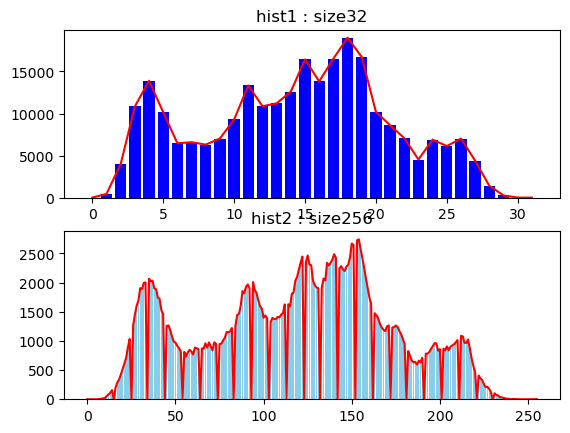

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst1 = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

hist1 = cv2.calcHist(images=[dst1], channels=[0], mask=None, histSize=[32], ranges=[0,256])
hist2 = cv2.calcHist(images=[dst2], channels=[0], mask=None, histSize=[256], ranges=[0,256])

hist1 = hist1.flatten() #32
hist2 = hist2.flatten() #256

plt.subplot(2,1,1)
plt.title("hist1 : size32")
plt.plot(hist1, c='r')
plt.bar(np.arange(32), hist1, color='blue')

plt.subplot(2,1,2)
plt.title("hist2 : size256")
plt.plot(hist2, c='r')
plt.bar(np.arange(256), hist2, color='skyblue')

plt.show()

## kawkes 실제 이미지, 명암비 히스토그램 확인 후 선명하게 변경
> 1. 명암비 히스토그램 확인 <br>
> 2. 선명하기 변경

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./image/hawkes.bmp', cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[32], ranges=[0,256])
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0,256])

hist1 = hist1.flatten() #32
hist2 = hist2.flatten() #256

plt.subplot(2,1,1)
plt.title("hist1 : size32")
plt.plot(hist1, c='r')
plt.bar(np.arange(32), hist1, color='blue')

plt.subplot(2,1,2)
plt.title("hist2 : size256")
plt.plot(hist2, c='r')
plt.bar(np.arange(256), hist2, color='skyblue')

<BarContainer object of 256 artists>

<BarContainer object of 256 artists>

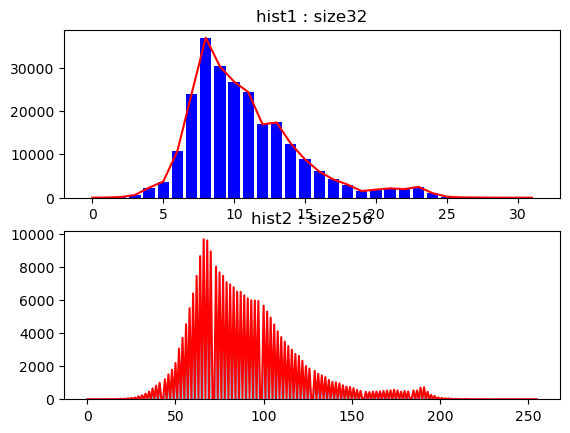

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./image/hawkes.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

hist1 = cv2.calcHist(images=[dst], channels=[0], mask=None, histSize=[32], ranges=[0,256])
hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None, histSize=[256], ranges=[0,256])

hist1 = hist1.flatten() #32
hist2 = hist2.flatten() #256

plt.subplot(2,1,1)
plt.title("hist1 : size32")
plt.plot(hist1, c='r')
plt.bar(np.arange(32), hist1, color='blue')

plt.subplot(2,1,2)
plt.title("hist2 : size256")
plt.plot(hist2, c='r')
plt.bar(np.arange(256), hist2, color='skyblue')

# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()

In [ ]:
# 추가 데이터를 넣음으로서 명암이 사라짐
src[:10,:10] = 0
src[11:20, 11:20] = 255
dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 히스토그램 평활화
> 영상의 픽셀 값 분포가 그레이스케일 전체영역에서 균일하게 분포하도록 변경하는 알고리즘 <br>
> 특정 밝기값 근방에 몰려있는 픽셀 분포를 분산시킴 <br>
> 히스토그램 누적 함수 H(g)를 이용하여 계산 <br>
> cv2.equalizeHist(src[,dst])


<BarContainer object of 256 artists>

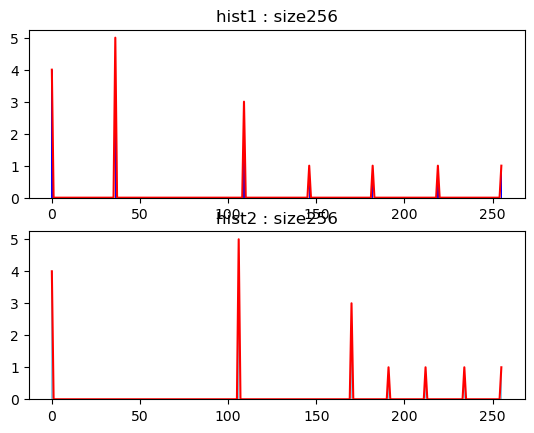

In [16]:
src = np.array([[0,0,0,0], 
               [1,1,3,5],
               [6,1,1,3],
               [4,3,1,7]], dtype=np.uint8)

dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

hist1 = cv2.calcHist(images=[dst], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist1 = hist1.flatten() #256

dst2 = cv2.equalizeHist(dst)
hist2 = cv2.calcHist(images=[dst2], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist2 = hist2.flatten() #256

plt.subplot(2,1,1)
plt.title("hist1 : size256")
plt.plot(hist1, c='r')
plt.bar(np.arange(256), hist1, color='blue')


# 평활화
plt.subplot(2,1,2)
plt.title("hist2 : size256")
plt.plot(hist2, c='r')
plt.bar(np.arange(256), hist2, color='skyblue')

In [ ]:
# 레나 영상 노멀라이즈 평활화 모두 적용하여 원본과 비교

import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
dst2 = cv2.equalizeHist(src)
dst3 = cv2.equalizeHist(dst)

cv2.imshow('norm', dst)
cv2.imshow('norm_equl', dst2)
cv2.imshow('equl', dst3)
cv2.waitKey()
cv2.destroyAllWindows()


# 히스토그램
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist1 = hist1.flatten() #256

hist2 = cv2.calcHist(images=[dst3], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist2 = hist2.flatten() #256

plt.subplot(2,1,1)
plt.title("hist1 : size256")
plt.plot(hist1, c='r')
plt.bar(np.arange(256), hist1, color='blue')

plt.subplot(2,1,2)
plt.title("hist2 : size256_norm_equal")
plt.plot(hist2, c='r')
plt.bar(np.arange(256), hist2, color='skyblue')

In [ ]:
# hawkes 영상 노멀라이즈 평활화 모두 적용하여 원본과 비교

import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./image/hawkes.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
dst2 = cv2.equalizeHist(src)
dst3 = cv2.equalizeHist(dst)

cv2.imshow('norm', dst)
cv2.imshow('norm_equl', dst2)
cv2.imshow('equl', dst3)
cv2.waitKey()
cv2.destroyAllWindows()


# 히스토그램
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist1 = hist1.flatten() #256

hist2 = cv2.calcHist(images=[dst3], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist2 = hist2.flatten() #256

plt.subplot(2,1,1)
plt.title("hist1 : size256")
plt.plot(hist1, c='r')
plt.bar(np.arange(256), hist1, color='blue')

plt.subplot(2,1,2)
plt.title("hist2 : size256_norm_equal")
plt.plot(hist2, c='r')
plt.bar(np.arange(256), hist2, color='skyblue')

## 컬러 영상 히스토그램 평활화
> 컬러영상에 히스토그램 평활화를 바로 할 경우 색이 변할 수 있기 때문에 RGB로 받은 이미지를 HSV또는 YCrCb 형태의 이미지로 변경한 경우 밝기값을 변경해야한다.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 영상 입력
src = cv2.imread('./image/lena.jpg')
# BGR을 HSV로 변환
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
# h, s, v로 컬러영상을 분리
h, s, v = cv2.split(hsv)
# v값을 히스토그램 평활화
equalizeHistV = cv2.equalizeHist(v)
# 다시 h,s,v를 merge
hsv2 = cv2.merge([h,s,equalizeHistV])
hsvDst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)

yCrCb = cv2.cvtColor(hsvDst, cv2.COLOR_BGR2YCrCb)
y, Cr, Cb = cv2.split(yCrCb)
equalizeHistY = cv2.equalizeHist(y)
yCrCb2 = cv2.merge([equalizeHistY, Cr, Cb])
yCrCbDst = cv2.cvtColor(yCrCb2, cv2.COLOR_YCrCb2BGR)

yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cb = cv2.split(yCrCb)
equalizeHistY = cv2.equalizeHist(y)
yCrCb2 = cv2.merge([equalizeHistY, Cr, Cb])
yCrCbDst2 = cv2.cvtColor(yCrCb2, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('hsvDst', hsvDst)
cv2.imshow('yCrCbDst', yCrCbDst2)
cv2.imshow('hsvyCrCbDst', yCrCbDst)

cv2.waitKey()
cv2.destroyAllWindows()

# 히스토그램
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist1 = hist1.flatten() #256

hist2 = cv2.calcHist(images=[hsvDst], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist2 = hist2.flatten() #256

hist3 = cv2.calcHist(images=[yCrCbDst2], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist3 = hist3.flatten() #256

hist4 = cv2.calcHist(images=[yCrCbDst], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist4 = hist4.flatten() #256

plt.subplot(2,2,1)
plt.title("hist1 : size256")
plt.plot(hist1, c='r')
plt.bar(np.arange(256), hist1, color='blue')

plt.subplot(2,2,2)
plt.title("hist2 : size256_hsv")
plt.plot(hist2, c='r')
plt.bar(np.arange(256), hist2, color='skyblue')

plt.subplot(2,2,3)
plt.title("hist3 : size256_yCrCb")
plt.plot(hist3, c='r')
plt.bar(np.arange(256), hist3, color='skyblue')

plt.subplot(2,2,4)
plt.title("hist4 : size256_hsv_YCrCb")
plt.plot(hist4, c='r')
plt.bar(np.arange(256), hist4, color='skyblue')

# Blur Filter
> cv2.GaussianBlur(src, ksize, sigmaX, dst=None, sigmaY=None, borderType=None) -> dst <br>
• src: 입력 영상. 각 채널 별로 처리됨. <br>
• dst: 출력 영상. src와 같은 크기, 같은 타입. <br>
• ksize: 가우시안 커널 크기. (0, 0)을 지정하면 sigma 값에 의해 자동 결정됨 <br>
• sigmaX: x방향 sigma. <br>
• sigmaY: y방향 sigma. 0이면 sigmaX와 같게 설정. <br>
• borderType: 가장자리 픽셀 확장 방식. <br> 
굳이 잘 안쓴다.
<br><br>
cv2.medianBlur(src, ksize, dst=None) -> dst <br>
• src : 입력 영상. 각 채널 별로 처리됨 <br>
• ksize : 커널 크기. 1보다 큰 홀수를 지정. 숫자 하나를 집어주면 됌 <br>
• dst : 출력 영상, src와 같은 크기, 같은 타입

In [ ]:
import cv2
import numpy as np

lena = cv2.imread('./image/lena.jpg')

blur = cv2.blur(lena, (10, 10))
boxFilter = cv2.boxFilter(lena, -1, (10, 10))
GaussianBlur = cv2.GaussianBlur(lena, (0,0), 20)
medianBlur = cv2.medianBlur(lena, 11)
bf100_50 = cv2.bilateralFilter(lena, -1, 100, 50)

cv2.imshow('blur', blur)
cv2.imshow('boxFilter', boxFilter)
cv2.imshow('GaussianBlur', GaussianBlur)
cv2.imshow('medianBlur', medianBlur)
cv2.imshow('bilateralFilter', bf100_50)
cv2.waitKey()
cv2.destroyAllWindows()

## 넘파이로 bordertype에 의한 변화 확인

In [8]:
import cv2
import numpy as np

src1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]], dtype=np.uint8)
dst1 = np.zeros(shape=(3,3))
for i in range(3) :
    for j in range(3) :
        dst1[i, j] = np.mean(src1[i:i+3, j:j+3])
        
dst1 = np.uint8(dst1)

cv2.boxFilter(src1, -1, (3, 3), borderType=cv2.BORDER_CONSTANT)

array([[1, 2, 2],
       [3, 5, 4],
       [3, 4, 3]], dtype=uint8)

## BorderType에 따른 변화 확인

In [ ]:
import cv2
import numpy as np
lena = cv2.imread('./image/lena.jpg')

constant = cv2.boxFilter(lena, -1, (30, 30), borderType=cv2.BORDER_CONSTANT)
replicate = cv2.boxFilter(lena, -1, (30, 30), borderType=cv2.BORDER_REPLICATE)
reflect = cv2.boxFilter(lena, -1, (30, 30), borderType=cv2.BORDER_REFLECT)
reflect_101= cv2.boxFilter(lena, -1, (30, 30), borderType=cv2.BORDER_REFLECT_101)

cv2.imshow('constant', constant)
cv2.imshow('replicate', replicate)
cv2.imshow('reflect', reflect)
cv2.imshow('reflect_101', reflect_101)
cv2.waitKey()
cv2.destroyAllWindows()

## bilateralFilter
> cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, dst=None, borderType=None) -> dst <br><br>
• src: 입력 영상. 8비트 또는 실수형, 1채널 또는 3채널.<br>
• d: 필터링에 사용될 이웃 픽셀의 거리(지름), 음수(-1)를 입력하면 sigmaSpace 값에 의해 자동 결정(권장)<br>
• sigmaColor: 색 공간에서 필터의 표준 편차<br>
• sigmaSpace: 좌표 공간에서 필터의 표준 편차<br>
• dst: 출력 영상. src와 같은 크기, 같은 타입.<br>
• borderType: 가장자리 픽셀 처리 방식

In [ ]:
import cv2
import numpy as np
lena = cv2.imread('./image/lena.jpg')

bf10_5 = cv2.bilateralFilter(lena, -1, 10, 5)
bf100_80 = cv2.bilateralFilter(lena, -1, 100, 80)
bf100_50 = cv2.bilateralFilter(lena, -1, 100, 50)

cv2.imshow('lena', lena)
cv2.imshow('bf10_5', bf10_5)
cv2.imshow('bf100_80', bf100_80)
cv2.imshow('bf100_50', bf100_50)
cv2.waitKey()
cv2.destroyAllWindows()

## medianBlur
>cv2.medianBlur(src, ksize, dst=None) -> dst <br><br>
• src : 입력 영상. 각 채널 별로 처리됨 <br>
• ksize : 커널 크기. 1보다 큰 홀수를 지정. 숫자 하나를 집어주면 됌 <br>
• dst : 출력 영상, src와 같은 크기, 같은 타입

In [ ]:
import cv2
import numpy as np

lena = cv2.imread('./image/lena.jpg')

medianBlur2 = cv2.medianBlur(lena, 11)
medianBlur51 = cv2.medianBlur(lena, 51)
medianBlur101 = cv2.medianBlur(lena, 101)

cv2.imshow('medianBlur2', medianBlur11)
cv2.imshow('medianBlur51', medianBlur51)
cv2.imshow('medianBlur101', medianBlur101)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

lena = cv2.imread('./image/lena.jpg')

medianBlur2 = cv2.medianBlur(lena, 11)
medianBlur51 = cv2.medianBlur(lena, 51)
medianBlur101 = cv2.medianBlur(lena, 101)

cv2.imshow('medianBlur2', medianBlur11)
cv2.imshow('medianBlur51', medianBlur51)
cv2.imshow('medianBlur101', medianBlur101)
cv2.waitKey()
cv2.destroyAllWindows()

# salt & peppers noise removal
### medianblur

In [ ]:
import cv2
import numpy as np

lena = cv2.imread('./image/saltNpepper_lena.png')
lena_mb= cv2.medianBlur(lena, 3)

titanic = cv2.imread('./image/saltNpepper_tit.png')
titanic_mb= cv2.medianBlur(titanic, 11)

athens = cv2.imread('./image/saltNpepper_athens.png')
athens_mb = cv2.medianBlur(athens, 7)

wall = cv2.imread('./image/saltNpepper_wall.png')
wall_mb = cv2.medianBlur(wall, 9)

cv2.imshow('lena', lena)
cv2.imshow('lena_mb', lena_mb)
cv2.imshow('titanic', titanic)
cv2.imshow('titanic_mb', titanic_mb)
cv2.imshow('athens', athens)
cv2.imshow('athens_mb', athens_mb)
cv2.imshow('wall', wall)
cv2.imshow('wall_mb', wall_mb)

cv2.waitKey()
cv2.destroyAllWindows()

### bilateralFilter으로는 안됨

In [ ]:
import cv2
import numpy as np

lena = cv2.imread('./image/saltNpepper_lena.png')
lena_bf = cv2.bilateralFilter(lena, -1, 100, 90)

titanic = cv2.imread('./image/saltNpepper_tit.png')
titanic_bf = cv2.bilateralFilter(titanic, -1, 100, 90)

athens = cv2.imread('./image/saltNpepper_athens.png')
athens_bf = cv2.bilateralFilter(athens, -1, 100, 90)

wall = cv2.imread('./image/saltNpepper_wall.png')
wall_bf = cv2.bilateralFilter(wall, -1, 100, 90)

cv2.imshow('lena', lena)
cv2.imshow('lena_bf', lena_bf)
cv2.imshow('titanic', titanic)
cv2.imshow('titanic_bf', titanic_bf)
cv2.imshow('athens', athens)
cv2.imshow('athens_bf', athens_bf)
cv2.imshow('wall', wall)
cv2.imshow('wall_bf', wall_bf)

cv2.waitKey()
cv2.destroyAllWindows()

## sobel()

In [11]:
import cv2
import numpy as np

img = np.zeros(shape=(512,512), dtype=np.uint8)+255
pt1 = 200,200
pt2 = 300,300

src = cv2.rectangle(img, pt1, pt2, (0,0,0), -1)

gx = cv2.Sobel(src, ddepth=-1, dx=1, dy=0, ksize=3)
gy = cv2.Sobel(src, ddepth=-1, dx=0, dy=1, ksize=3)
gxo = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gyo = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

print(‘- ddepth = -1’)
print(gx[195:205, 195:205])
print(gx[295:305, 295:305])
print(gy[195:205, 195:205])
print(gy[295:305, 295:305])
print(‘- ddepth = cv2.CV_32F’)
print(gxo[195:205, 195:205])
print(gxo[295:305, 295:305])
print(gyo[195:205, 195:205])
print(gyo[295:305, 295:305])
gxo = np.abs(gxo)
gyo = np.abs(gyo)

print(‘- 32F after absolute’)
print(gxo[195:205, 195:205])
print(gxo[295:305, 295:305])
print(gyo[195:205, 195:205])
print(gyo[295:305, 295:305])
gxo = np.sqrt(gxo)
gyo = np.sqrt(gyo)

print(‘- 32F after root’)
print(gxo[195:205, 195:205])
print(gxo[295:305, 295:305])
print(gyo[195:205, 195:205])
print(gyo[295:305, 295:305])
gxo = cv2.normalize(gxo, 0, 255, norm_type=cv2.NORM_MINMAX)
gyo = cv2.normalize(gyo, 0, 255, norm_type=cv2.NORM_MINMAX)

print(‘- 32F after stretching’)
print(gxo[195:205, 195:205])
print(gxo[295:305, 295:305])
print(gyo[195:205, 195:205])
print(gyo[295:305, 295:305])

cv2.imshow(‘src’, src)
cv2.imshow(‘gxo’, gxo)
cv2.imshow(‘gyo’, gyo)
cv2.imshow(‘gxo+gyo’, gxo+gyo)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

[[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.  -255.  -255.     0.     0.     0.     0.]
 [    0.     0.     0.     0.  -765.  -765.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -1020. -1020.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -1020. -1020.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -1020. -1020.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -1020. -1020.     0.     0.     0.     0.]]
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    

## magnitude()

In [2]:
# sobel 적용 후 magnitude로 에지 추출
import cv2
import numpy as np

img = np.zeros(shape=(512,512), dtype=np.uint8)+255
pt1 = 200,200
pt2 = 300,300

src = cv2.rectangle(img, pt1, pt2, (0,0,0), -1)
gxo = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gyo = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
mag = cv2.magnitude(gxo, gyo)

dstM = cv2.normalize(mag, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('src', src)
cv2.imshow('dstM', dstM)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## lena로 실습

In [131]:
# Lena, sobel 적용 후 magnitude로 에지 추출
import cv2
import numpy as np

src = cv2.imread('./image/lena.jpg', 0)

gx = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gy = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
gx1 = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=9)
gy1 = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=9)

mag = cv2.magnitude(gx, gy)
mag1 = cv2.magnitude(gx1, gy1)

dstM = cv2.normalize(mag, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
dstM1 = cv2.normalize(mag1, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('src', src)
cv2.imshow('dstM', dstM)
cv2.imshow('dstM1', dstM1)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## laplacian()

In [11]:
import cv2
import numpy as np

src = cv2.imread('./image/lena.jpg', 0)

lap = cv2.Laplacian(src, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)
print('lap : ', minVal, maxVal, minLoc, maxLoc)
print(lap[:10, :10])

dst = cv2.convertScaleAbs(lap)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dst)
print('lap : ', minVal, maxVal, minLoc, maxLoc)
print(lap[:10, :10])

dst2 = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dst2)
print('lap : ', minVal, maxVal, minLoc, maxLoc)
print(lap[:10, :10])


cv2.imshow('lap', lap)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

lap :  -239.0 189.0 (404, 181) (221, 287)
[[ -4.   0.   2.   6.  -9.  10.  -7.   4.  -7.   6.]
 [  1.   0.  -1.   2.  -9.  16.  -8.   4.  -6.   5.]
 [  0.   2.  -4.   4.  -9.  11.  -7.   5. -10.   6.]
 [  4.  -1.  -3.   1.  -6.  11.  -6.   5. -10.   1.]
 [ -3.  -4.  -1.   5.  -5.  11. -11.   1.  -5.  -3.]
 [ -1.  -3.  -3.  10.  -8.  11. -11.   5.  -1.  -4.]
 [  0.  -2.   1.   5.  -6.   5.  -8.  11.  -1.  -5.]
 [ -2.  -2.  -1.  10. -15.   7. -10.  23.   9. -14.]
 [  6.   3.   0.   1.   4.  -4.  -4.   1. -38.  16.]
 [  3.   0.   0.  -1.  -1.  -2.   1.   9.  -9.  11.]]
lap :  0.0 239.0 (1, 0) (404, 181)
[[ -4.   0.   2.   6.  -9.  10.  -7.   4.  -7.   6.]
 [  1.   0.  -1.   2.  -9.  16.  -8.   4.  -6.   5.]
 [  0.   2.  -4.   4.  -9.  11.  -7.   5. -10.   6.]
 [  4.  -1.  -3.   1.  -6.  11.  -6.   5. -10.   1.]
 [ -3.  -4.  -1.   5.  -5.  11. -11.   1.  -5.  -3.]
 [ -1.  -3.  -3.  10.  -8.  11. -11.   5.  -1.  -4.]
 [  0.  -2.   1.   5.  -6.   5.  -8.  11.  -1.  -5.]
 [ -2.  -2.  -1.  10.

-1

### gaussian filter 적용

In [25]:
import cv2
import numpy as np

src = cv2.imread('./image/lena.jpg', 0)
# 가우시안 핉저 적용
GaussianBlur = cv2.GaussianBlur(src, (3,3), 3)

# 1차 미분
gx = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gy = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
mag = cv2.magnitude(gx, gy)
dstM = cv2.normalize(mag, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# 2차 미분                    
lap = cv2.Laplacian(src, cv2.CV_32F)
lap1 = cv2.Laplacian(GaussianBlur, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)
print('lap : ', minVal, maxVal, minLoc, maxLoc)
print(lap[:10, :10])

dst = cv2.convertScaleAbs(lap)
dst1 = cv2.convertScaleAbs(lap1)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dst)
print('lap : ', minVal, maxVal, minLoc, maxLoc)
print(lap[:10, :10])

dstM1 = cv2.normalize(dst, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
dstM2 = cv2.normalize(dst1, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dst2)
print('lap : ', minVal, maxVal, minLoc, maxLoc)
print(lap[:10, :10])

cv2.imshow('src', src)
cv2.imshow('dstM', dstM)
cv2.imshow('dstM1', dstM1)
cv2.imshow('dstM2', dstM2)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

# 가우시안 블러로 잡음을 제거 한 후 2차 미분을 할 경우 잡음이 제거되는 효과를 볼 수 있다.
# 1차 미분에 비해 좋은 효과를 얻기 위해 손이 많이 가는 단점이 있었다.


lap :  -239.0 189.0 (404, 181) (221, 287)
[[ -4.   0.   2.   6.  -9.  10.  -7.   4.  -7.   6.]
 [  1.   0.  -1.   2.  -9.  16.  -8.   4.  -6.   5.]
 [  0.   2.  -4.   4.  -9.  11.  -7.   5. -10.   6.]
 [  4.  -1.  -3.   1.  -6.  11.  -6.   5. -10.   1.]
 [ -3.  -4.  -1.   5.  -5.  11. -11.   1.  -5.  -3.]
 [ -1.  -3.  -3.  10.  -8.  11. -11.   5.  -1.  -4.]
 [  0.  -2.   1.   5.  -6.   5.  -8.  11.  -1.  -5.]
 [ -2.  -2.  -1.  10. -15.   7. -10.  23.   9. -14.]
 [  6.   3.   0.   1.   4.  -4.  -4.   1. -38.  16.]
 [  3.   0.   0.  -1.  -1.  -2.   1.   9.  -9.  11.]]
lap :  0.0 239.0 (1, 0) (404, 181)
[[ -4.   0.   2.   6.  -9.  10.  -7.   4.  -7.   6.]
 [  1.   0.  -1.   2.  -9.  16.  -8.   4.  -6.   5.]
 [  0.   2.  -4.   4.  -9.  11.  -7.   5. -10.   6.]
 [  4.  -1.  -3.   1.  -6.  11.  -6.   5. -10.   1.]
 [ -3.  -4.  -1.   5.  -5.  11. -11.   1.  -5.  -3.]
 [ -1.  -3.  -3.  10.  -8.  11. -11.   5.  -1.  -4.]
 [  0.  -2.   1.   5.  -6.   5.  -8.  11.  -1.  -5.]
 [ -2.  -2.  -1.  10.

-1

## unshapmask filter

In [32]:
import cv2
import numpy as np

src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=0.0)
sharp = src - blur
ret = blur + sharp
ret1 = blur + sharp * 2
ret2 = src + sharp
ret3 = src + sharp * 2

cv2.imshow('src', src)
cv2.imshow('blur', blur)
cv2.imshow('sharp', sharp)
cv2.imshow('ret', ret)
cv2.imshow('ret1', ret1)
cv2.imshow('ret2', ret2)
cv2.imshow('ret3', ret3)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# filter2D, sepFilter2D 
> filter2D : kernel을 통해 이미지를 필터링 <br>
sepFilter2D : 이미지의 KernelX, Kernely를 각각의 커널을 통해 필터링

In [36]:
import cv2
import numpy as np

src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.filter2D(src, -1, (3,3)) 
dst2 = cv2.sepFilter2D(src, cv2.CV_32F, 3, 3) # 조금 빠르다.

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# Morpholgy

## getStructuringElement()
> shape : element의 모양 <br> 
MORPH_RECT : 사각형 <br>
MORPH_CROSS : 십자 모양 <br>
MORPH_ELLIPSE : 타원형 모양 <br> <br>
KSIZE : STRUCTURING ELEMENT 사이즈



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)

kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) #사각형
kernal_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5)) #십자
kernal_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)) #타원

plt.style.use("grayscale")
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.imshow(kernal)
ax2.imshow(kernal_cross)
ax3.imshow(kernal_ellipse)

plt.show()

# 침식
## erode()

In [31]:
img = np.zeros(shape=(12, 12), dtype=np.uint8)
img[2:3, 5:7] = 1
img[3:8, 2:10] = 1
img[8:9, 2:5] = 1
img[8:9, 7:10] = 1


kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) #사각형
kernal_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3)) #십자
kernal_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) #타원

img2 = cv2.erode(img, kernal)
img3 = cv2.erode(img, kernal_cross)
img4 = cv2.erode(img, kernal_ellipse)

plt.style.use("grayscale")
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

ax1.imshow(img)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)

plt.show()

# 팽창
## dilate()

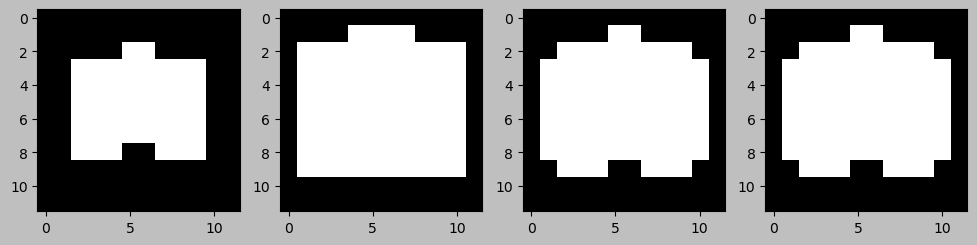

In [32]:
img = np.zeros(shape=(12, 12), dtype=np.uint8)
img[2:3, 5:7] = 1
img[3:8, 2:10] = 1
img[8:9, 2:5] = 1
img[8:9, 7:10] = 1


kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) #사각형
kernal_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3)) #십자
kernal_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) #타원

img2 = cv2.dilate(img, kernal)
img3 = cv2.dilate(img, kernal_cross)
img4 = cv2.dilate(img, kernal_ellipse)

plt.style.use("grayscale")
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

ax1.imshow(img)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)

plt.show()

## open(열기)
> 침식 + 팽창

In [35]:
img = np.zeros(shape=(12, 12), dtype=np.uint8)
img[2:3, 5:7] = 1
img[3:8, 2:10] = 1
img[8:9, 2:5] = 1
img[8:9, 7:10] = 1

kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) #사각형
kernal_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3)) #십자
kernal_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) #타원

img2 = cv2.erode(img, kernal)
img3 = cv2.erode(img, kernal_cross)
img4 = cv2.erode(img, kernal_ellipse)

img2 = cv2.dilate(img2, kernal)
img3 = cv2.dilate(img3, kernal_cross)
img4 = cv2.dilate(img4, kernal_ellipse)

plt.style.use("grayscale")
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

ax1.imshow(img)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)

plt.show()

## close(닫기)
> 팽창+침식

In [37]:
img = np.zeros(shape=(12, 12), dtype=np.uint8)
img[2:3, 5:7] = 1
img[3:8, 2:10] = 1
img[8:9, 2:5] = 1
img[8:9, 7:10] = 1

kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) #사각형
kernal_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3)) #십자
kernal_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) #타원

img2 = cv2.dilate(img, kernal)
img3 = cv2.dilate(img, kernal_cross)
img4 = cv2.dilate(img, kernal_ellipse)

img2 = cv2.erode(img2, kernal)
img3 = cv2.erode(img3, kernal_cross)
img4 = cv2.erode(img4, kernal_ellipse)

plt.style.use("grayscale")
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

ax1.imshow(img)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)

plt.show()

## morphologyEx()
> 닫기, 열기, gradient, blackhat, tophat 실행 가능

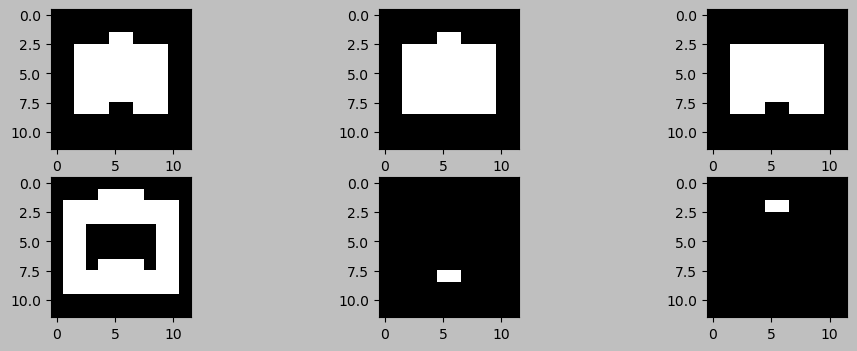

In [43]:
img = np.zeros(shape=(12, 12), dtype=np.uint8)
img[2:3, 5:7] = 1
img[3:8, 2:10] = 1
img[8:9, 2:5] = 1
img[8:9, 7:10] = 1

kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) #사각형
kernal_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3)) #십자
kernal_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) #타원

close1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernal, iterations=1)
open1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernal, iterations=1)
gradient1 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernal, iterations=1)
blackhat1 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernal, iterations=1)
tophat1 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernal, iterations=1)

plt.style.use("grayscale")
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)


ax1.imshow(img)
ax2.imshow(close1)
ax3.imshow(open1)
ax4.imshow(gradient1)
ax5.imshow(blackhat1)
ax6.imshow(tophat1)

plt.show()

# 실습 : 노이즈 제거, 노이즈 추출, 모폴로지 테두리 추출

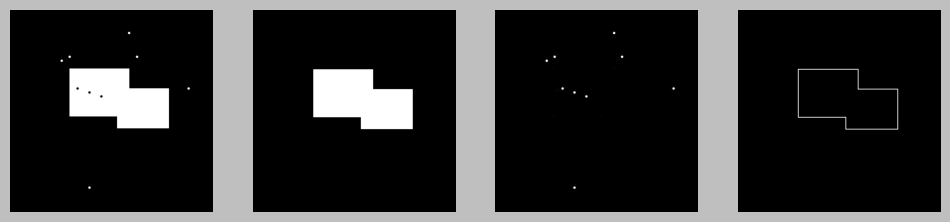

In [128]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./image/morphology.jpg', cv2.IMREAD_GRAYSCALE)

kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (30,30)) #사각형
kernal2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) #사각형
kernal3 = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7)) #사각형
kernal_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3)) #십자
kernal_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) #타원

# 노이즈 제거
open1 = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernal, iterations=1)
close1_end = cv2.morphologyEx(open1, cv2.MORPH_CLOSE, kernal, iterations=1)

# 노이즈 추출ㅁ
tophat1 = cv2.morphologyEx(src, cv2.MORPH_TOPHAT, kernal2, iterations=7)
blackhat1 = cv2.morphologyEx(src, cv2.MORPH_BLACKHAT, kernal3, iterations=1)
noise = tophat1 + blackhat1

# 모폴로지 테두리 추출
grd = cv2.morphologyEx(close1_end, cv2.MORPH_GRADIENT, kernal2, iterations=1)

plt.style.use("grayscale")
plt.figure(figsize=(12,8))
ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

ax1.imshow(src)
ax2.imshow(close1_end)
ax3.imshow(noise)
ax4.imshow(grd)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

plt.show()

## 방법2

In [119]:

src = cv2.imread('./image/morphology.jpg', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))

closing = cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernel, iterations = 5)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations = 5)
gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel)
#gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel, iterations = 5)
tophat = cv2.morphologyEx(src, cv2.MORPH_TOPHAT, kernel, iterations = 5)
blackhat = cv2.morphologyEx(src, cv2.MORPH_BLACKHAT, kernel, iterations = 5)

cv2.imshow('closing', closing)
cv2.imshow('opening', opening)
cv2.imshow('gradient', gradient)
cv2.imshow('tophat', tophat)
cv2.imshow('blackhat', blackhat)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## 레나 영상 morphologyEx 적용

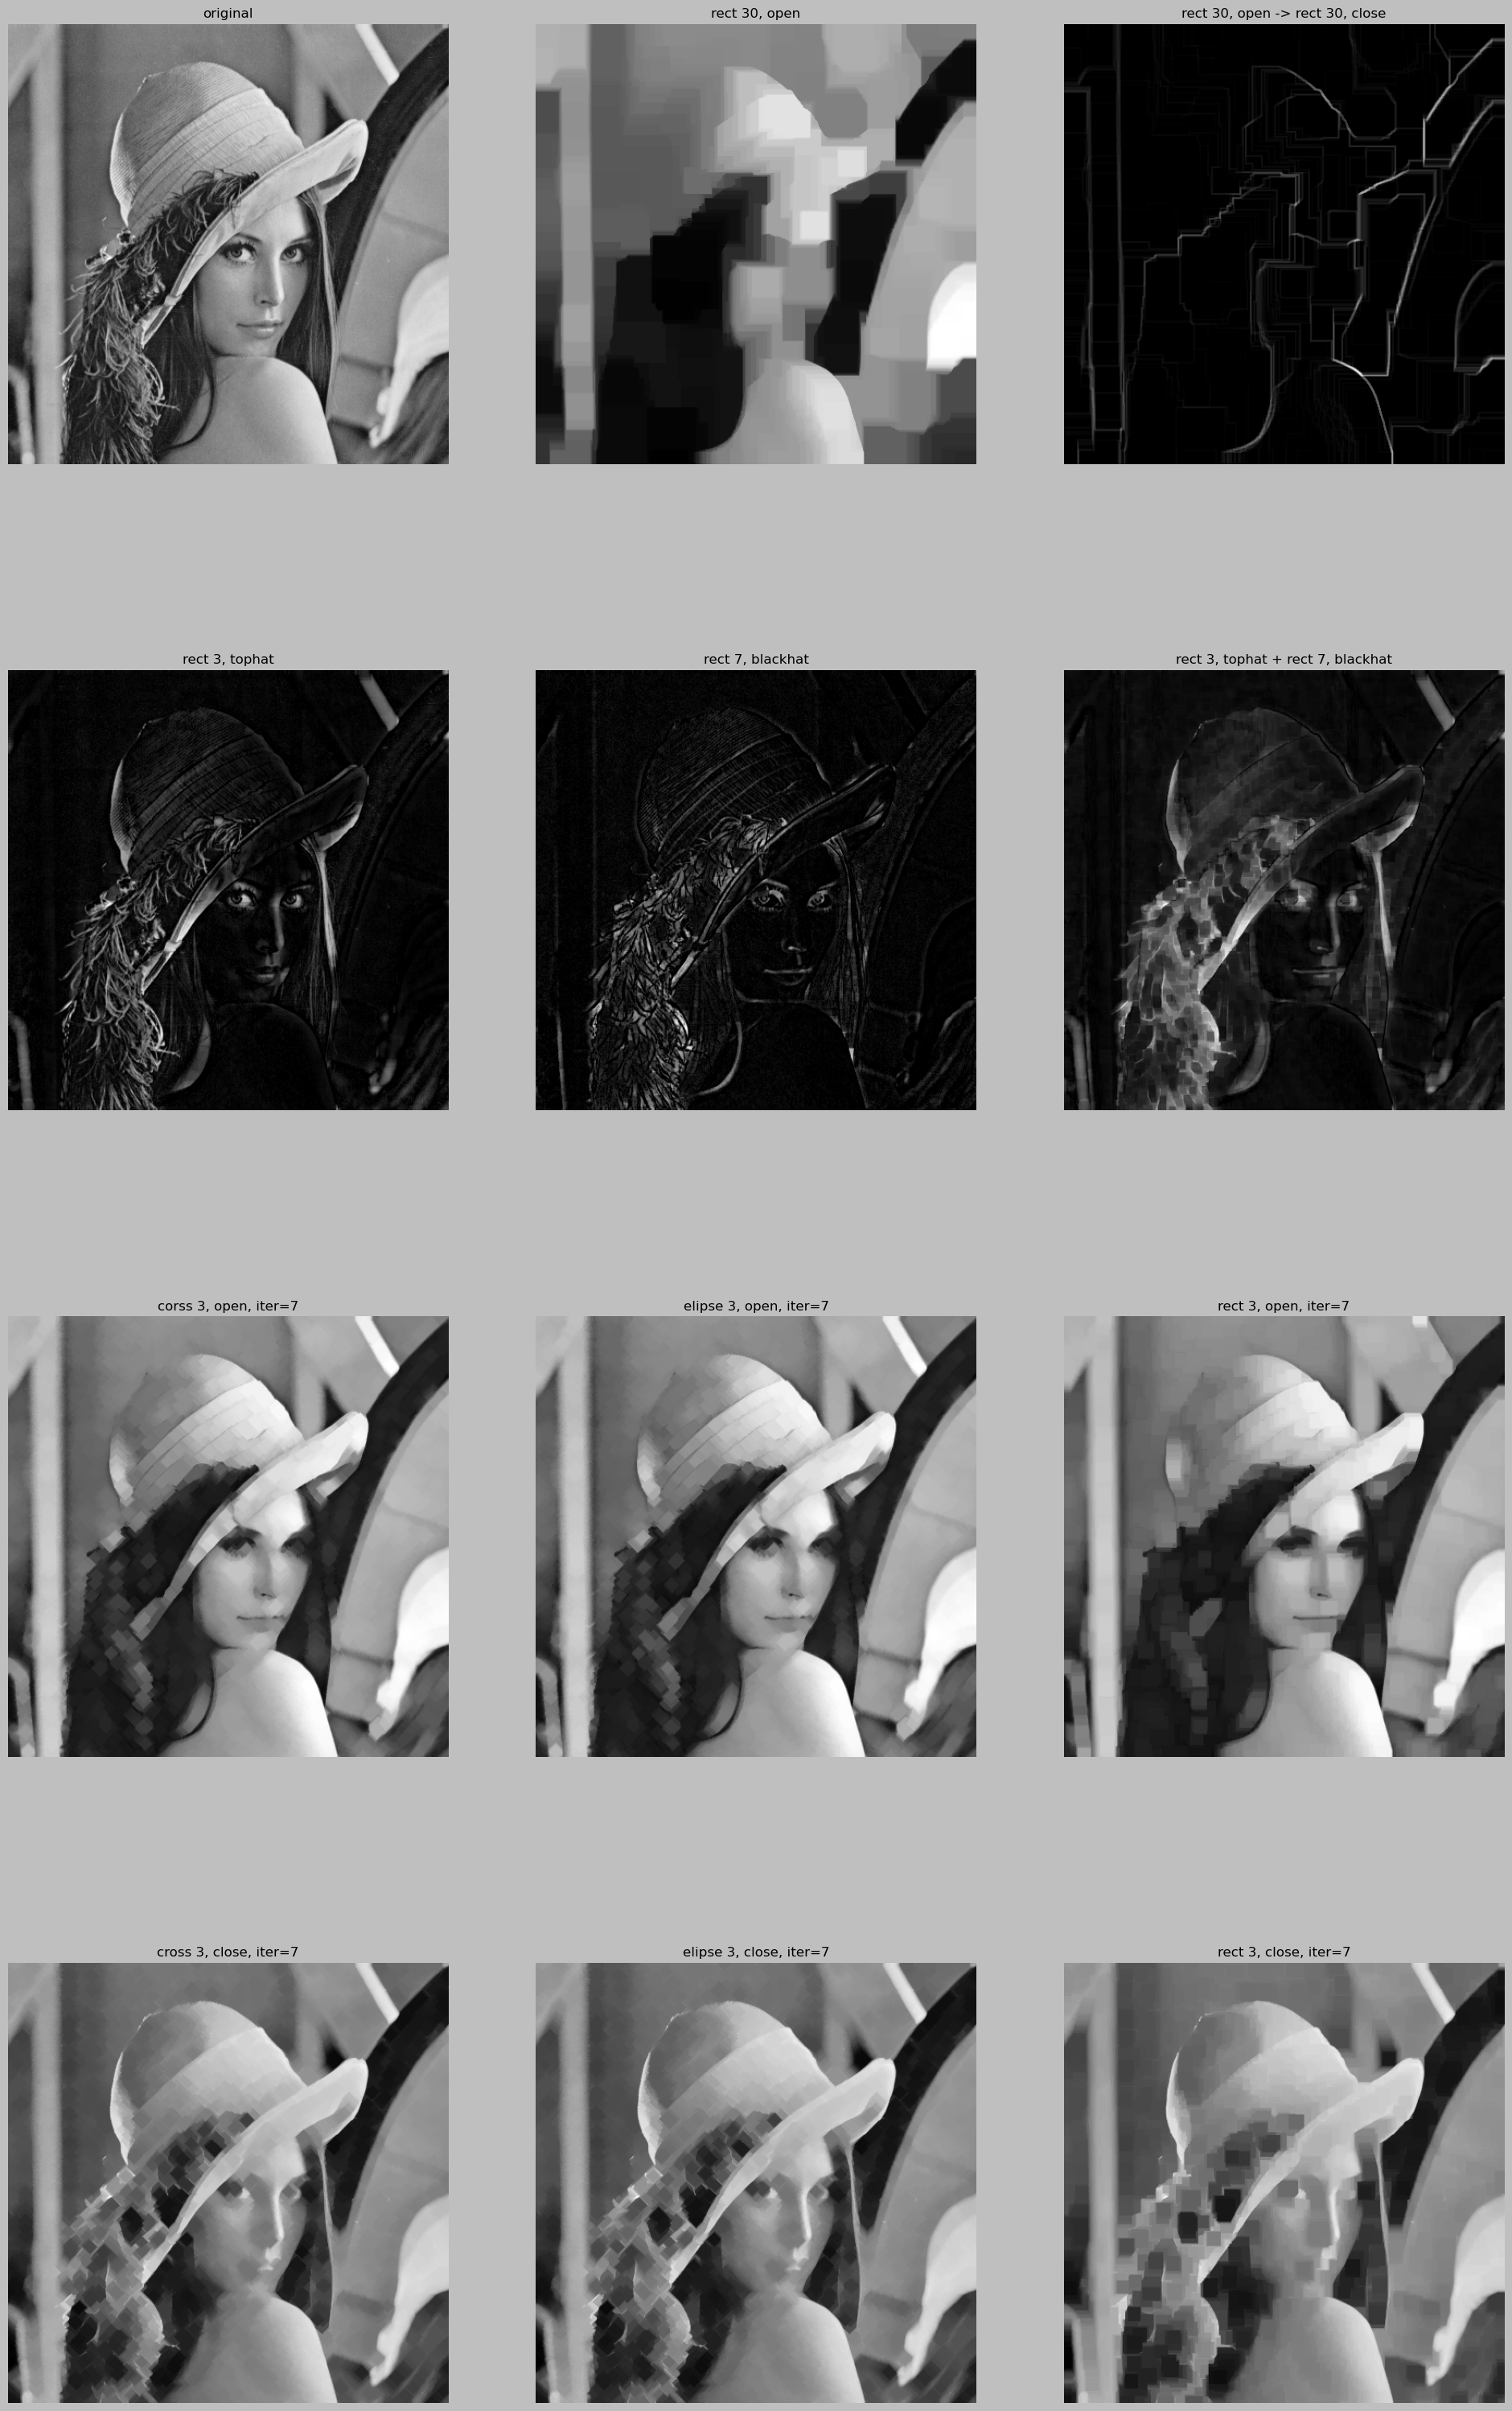

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)

kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (30,30)) #사각형
kernal2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) #사각형
kernal3 = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7)) #사각형
kernal_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3)) #십자
kernal_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) #타원

# 노이즈 제거
open1 = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernal, iterations=1)
close1_end = cv2.morphologyEx(open1, cv2.MORPH_CLOSE, kernal, iterations=1)

# 노이즈 추출
tophat1 = cv2.morphologyEx(src, cv2.MORPH_TOPHAT, kernal2, iterations=7)
blackhat1 = cv2.morphologyEx(src, cv2.MORPH_BLACKHAT, kernal3, iterations=1)
noise = tophat1 + blackhat1

# 모폴로지 테두리 추출
grd = cv2.morphologyEx(close1_end, cv2.MORPH_GRADIENT, kernal2, iterations=1)

# open
open_cross = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernal_cross, iterations=7)
open_elipse = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernal_ellipse, iterations=7)
open_rect = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernal2, iterations=7)

# close
close_cross = cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernal_cross, iterations=7)
close_elipse = cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernal_ellipse, iterations=7)
close_rect = cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernal2, iterations=7)


plt.style.use("grayscale")
plt.figure(figsize=(24,40)) #width, height

ax1 = plt.subplot(4,3,1)
ax2 = plt.subplot(4,3,2)
ax3 = plt.subplot(4,3,3)
ax4 = plt.subplot(4,3,4)
ax5 = plt.subplot(4,3,5)
ax6 = plt.subplot(4,3,6)
ax7 = plt.subplot(4,3,7)
ax8 = plt.subplot(4,3,8)
ax9 = plt.subplot(4,3,9)
ax10 = plt.subplot(4,3,10)
ax11 = plt.subplot(4,3,11)
ax12 = plt.subplot(4,3,12)

ax1.imshow(src)
ax2.imshow(close1_end)
ax3.imshow(grd)
ax4.imshow(tophat1)
ax5.imshow(blackhat1)
ax6.imshow(noise)
ax7.imshow(open_cross)
ax8.imshow(open_elipse)
ax9.imshow(open_rect)
ax10.imshow(close_cross)
ax11.imshow(close_elipse)
ax12.imshow(close_rect)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')
ax8.axis('off')
ax9.axis('off')
ax10.axis('off')
ax11.axis('off')
ax12.axis('off')

ax1.set_title("original")
ax2.set_title("rect 30, open")
ax3.set_title("rect 30, open -> rect 30, close")
ax4.set_title("rect 3, tophat")
ax5.set_title("rect 7, blackhat")
ax6.set_title("rect 3, tophat + rect 7, blackhat")
ax7.set_title('corss 3, open, iter=7')
ax8.set_title('elipse 3, open, iter=7')
ax9.set_title('rect 3, open, iter=7')
ax10.set_title('cross 3, close, iter=7')
ax11.set_title('elipse 3, close, iter=7')
ax12.set_title('rect 3, close, iter=7')

plt.show()

Text(0.5, 1.0, 'Blackhat, rect(3, 3), iter=2')

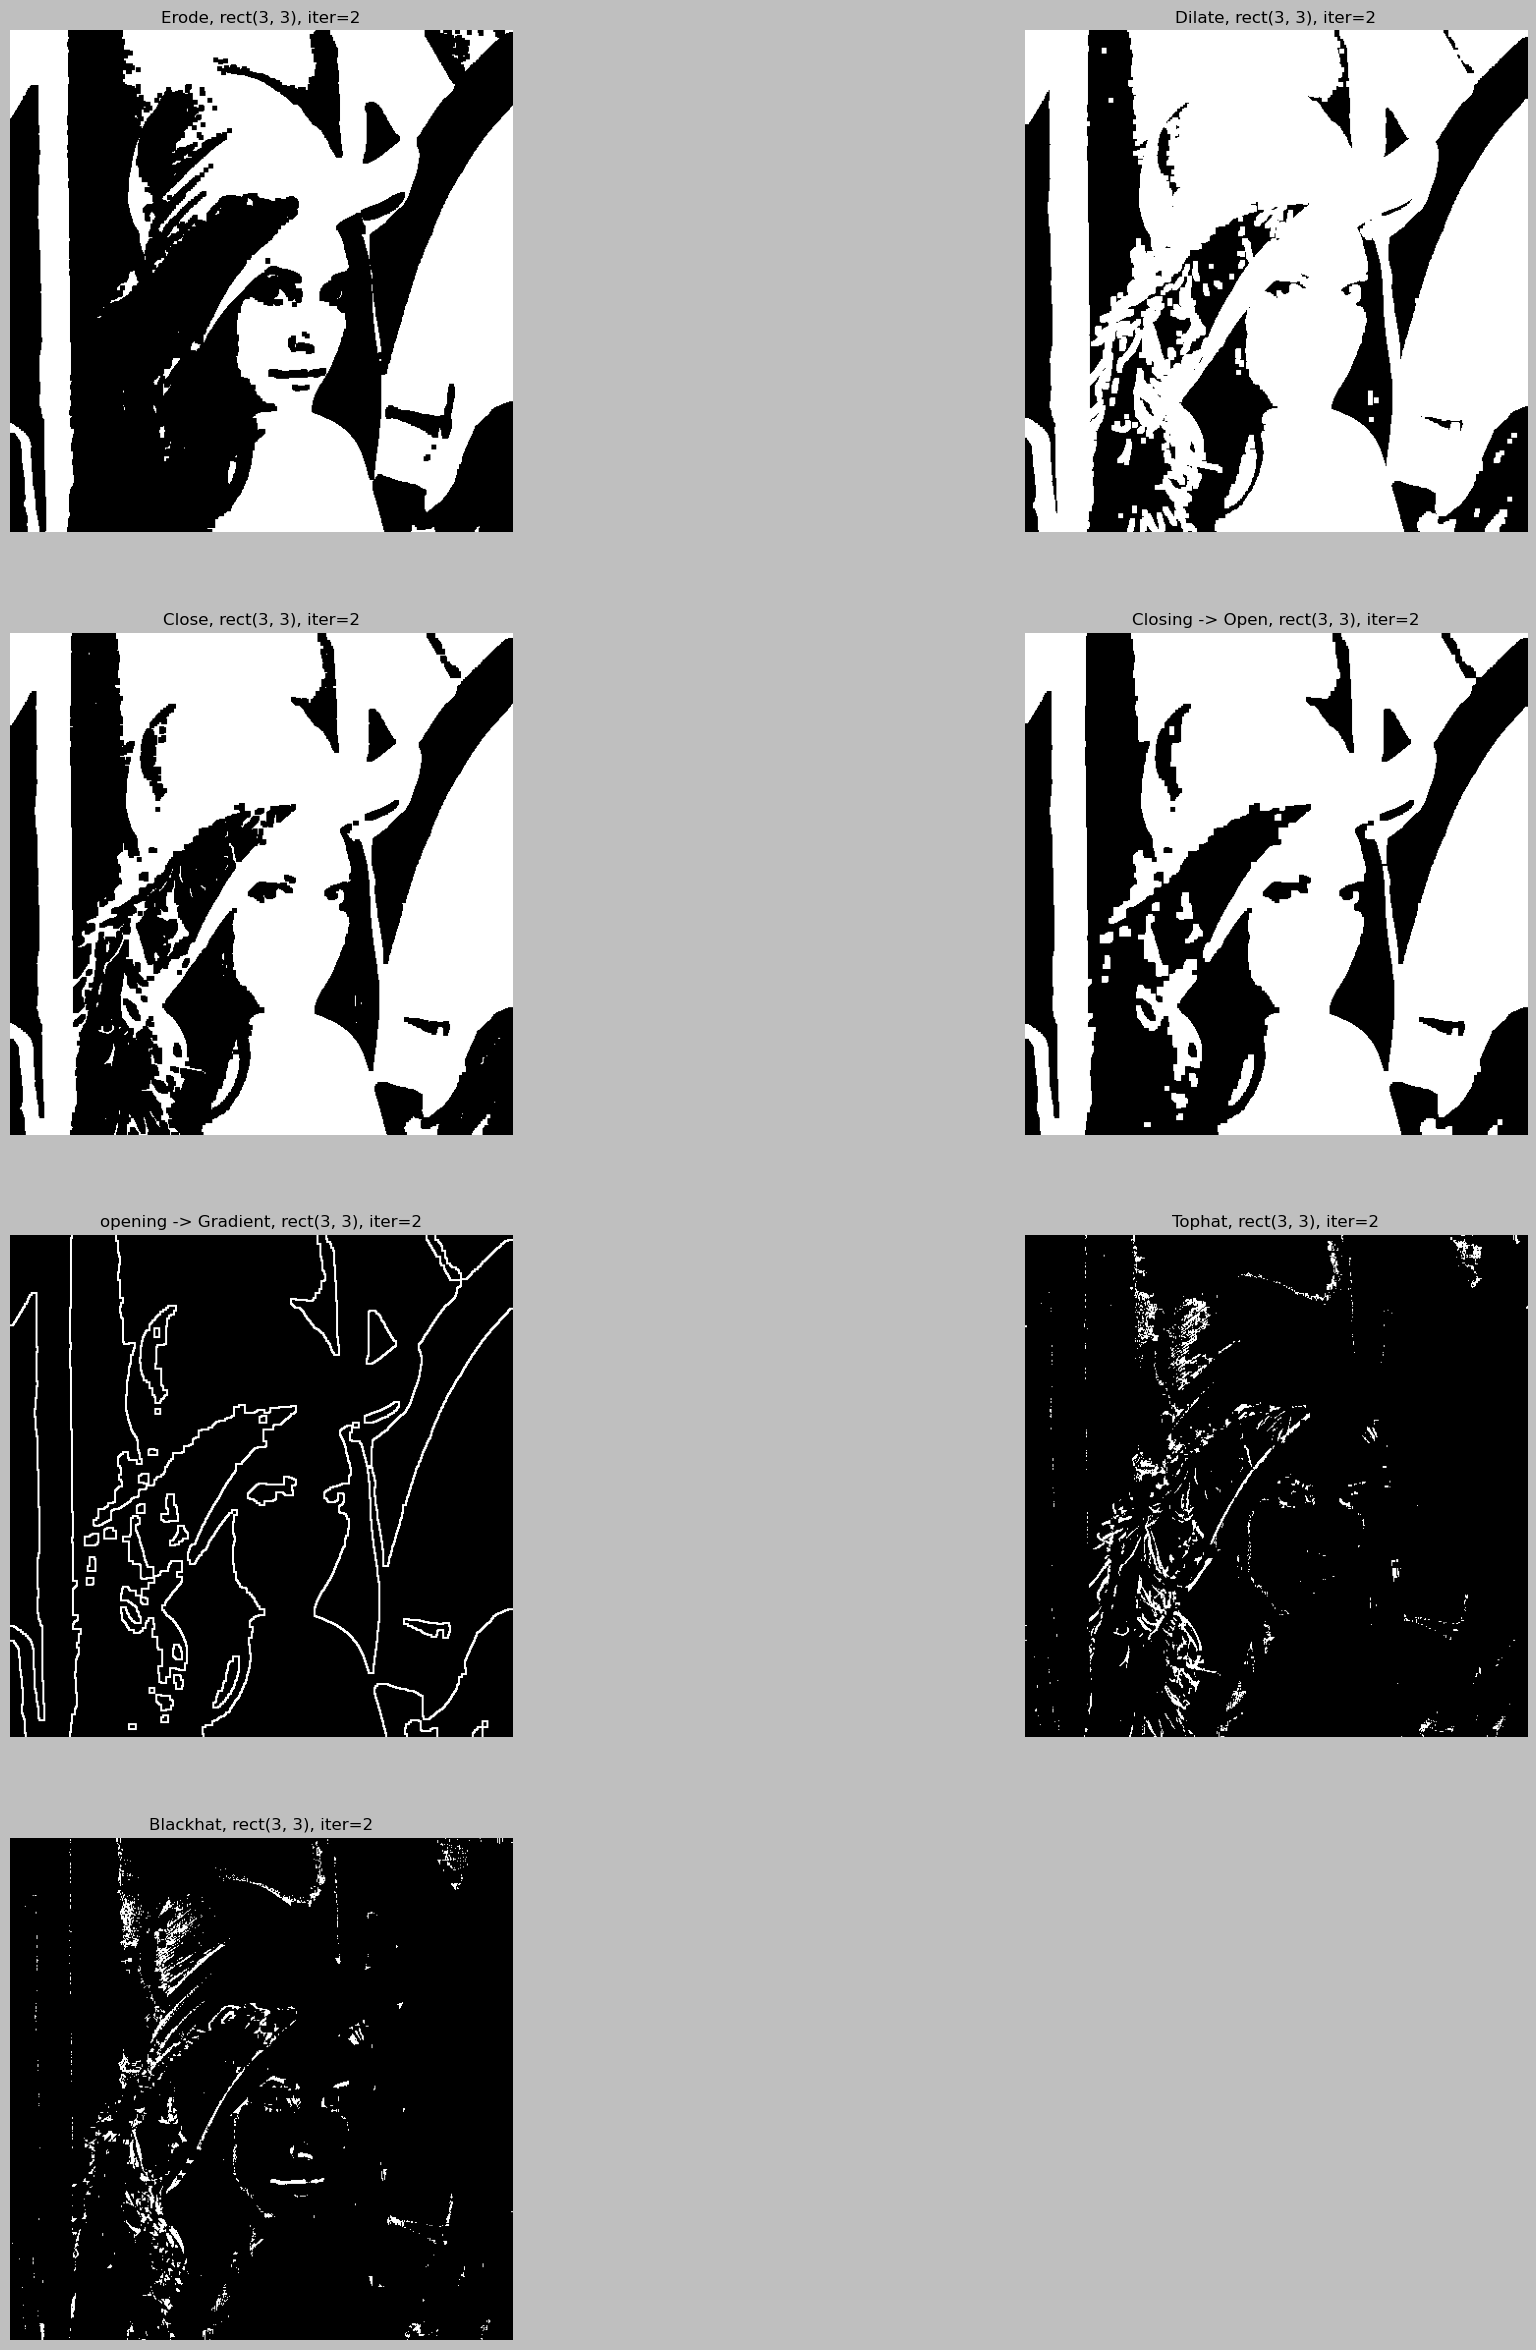

In [35]:
src = cv2.imread('./image/lena.jpg', 0)

ret, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

i = 2 # 2 이상부터 입이 없어진다
kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))

erode = cv2.morphologyEx(dst, cv2.MORPH_ERODE, kernel, iterations = i)
dilate = cv2.morphologyEx(dst, cv2.MORPH_DILATE, kernel, iterations = i)
closing = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel, iterations = i)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations = i)
gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(dst, cv2.MORPH_TOPHAT, kernel, iterations = i)
blackhat = cv2.morphologyEx(dst, cv2.MORPH_BLACKHAT, kernel, iterations = i)

plt.style.use("grayscale")
plt.figure(figsize=(24,30)) #width, height

ax1 = plt.subplot(4,2,1)
ax2 = plt.subplot(4,2,2)
ax3 = plt.subplot(4,2,3)
ax4 = plt.subplot(4,2,4)
ax5 = plt.subplot(4,2,5)
ax6 = plt.subplot(4,2,6)
ax7 = plt.subplot(4,2,7)


ax1.imshow(erode)
ax2.imshow(dilate)
ax3.imshow(closing)
ax4.imshow(opening)
ax5.imshow(gradient)
ax6.imshow(tophat)
ax7.imshow(blackhat)


ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')


ax1.set_title("Erode, rect(3, 3), iter=2")
ax2.set_title("Dilate, rect(3, 3), iter=2")
ax3.set_title("Close, rect(3, 3), iter=2")
ax4.set_title("Closing -> Open, rect(3, 3), iter=2")
ax5.set_title("opening -> Gradient, rect(3, 3), iter=2")
ax6.set_title("Tophat, rect(3, 3), iter=2")
ax7.set_title('Blackhat, rect(3, 3), iter=2')


# plt.show()

# cv2.imshow('blackhat', blackhat)
# cv2.imshow('tophat', tophat)
# cv2.imshow('gradient', gradient)
# cv2.imshow('closing', closing)
# cv2.imshow('opening', opening)
# cv2.imshow('dilate', dilate)
# cv2.imshow('erode', erode)
# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

# Labeling


cnt :  4 

labels : [0 1 2 3] 

stats : 
 [[     0      0    512    512 227637]
 [   340    110    121    121  11289]
 [   180    180    141    141  15373]
 [   300    350    101    101   7845]] 

centroids: 
 [[245.44863972 255.13168773]
 [400.         170.        ]
 [250.         250.        ]
 [350.         400.        ]] 



Text(0.5, 1.0, '')

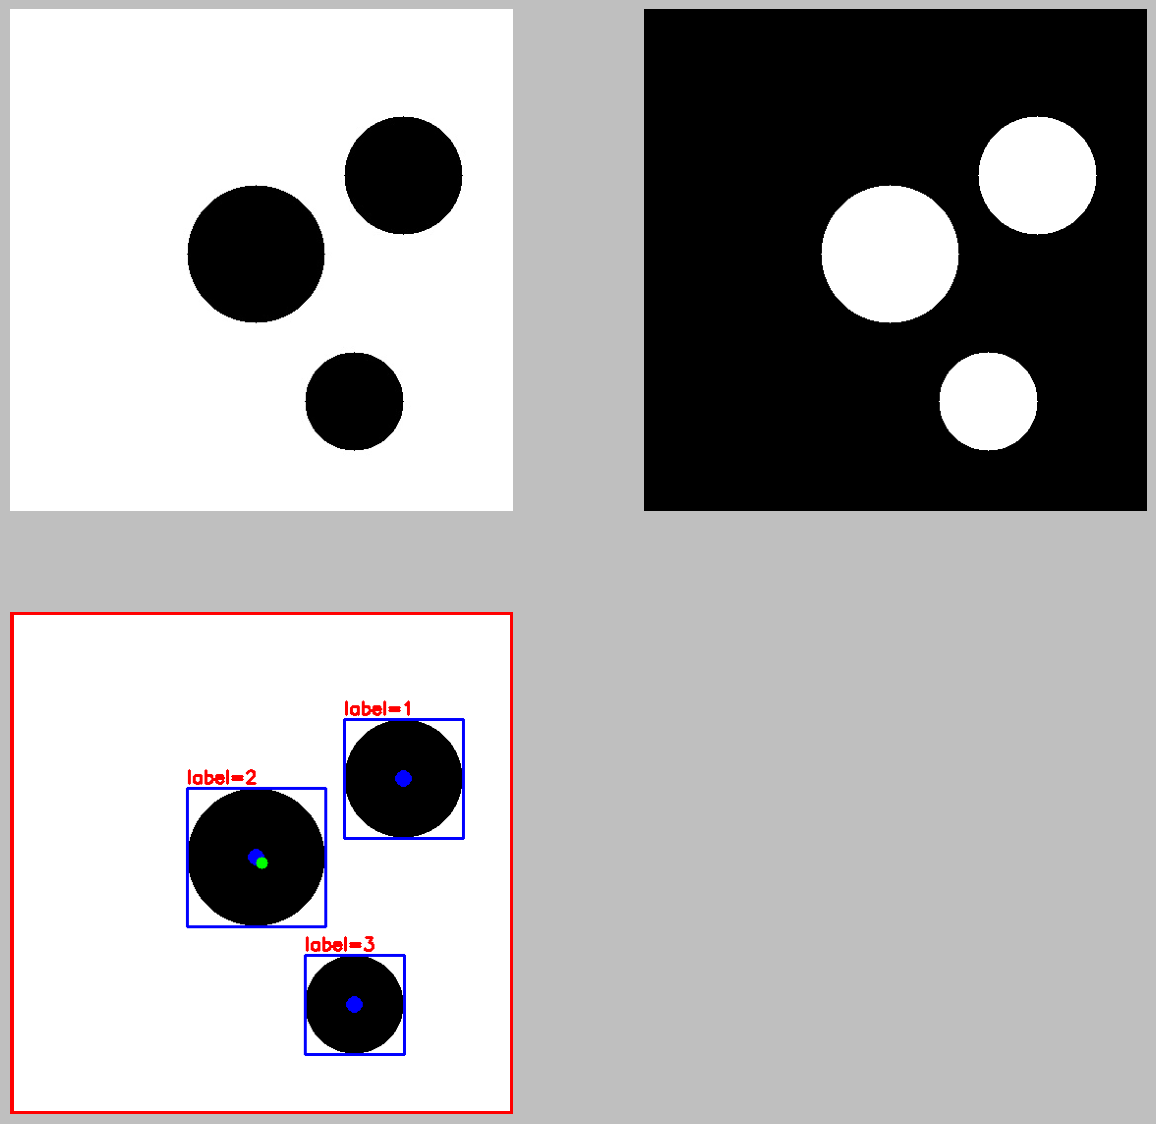

In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./image/circles.jpg', 0)
# flip = 255-src # 흑백 반전
# ret, dst = cv2.threshold(flip, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) #영상 이진화
ret, dst = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY_INV) #흑백 반전, 영상 이진화

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

print("cnt : ", cnt, "\n")
print('labels :', np.unique(labels), "\n")
print('stats : \n', stats, "\n")
print('centroids: \n', centroids, "\n")

flip2 = 255-dst # 흑백 반전
dst2 = cv2.cvtColor(flip2, cv2.COLOR_GRAY2BGR) #BGR화


for i in range(1, cnt):
    x, y, width, height, area = stats[i]
    cv2.rectangle(dst2, (x,y), (width+x, height+y), (0,0,255), 2) # 각 객체의 박스 생성
    
    cx = x + (width//2)
    cy = y + (width//2)
    cv2.circle(dst2,(cx, cy), 4, (0,0,255), 8) #각 객체의 중심원 생성
    
    # 문자 출력
    fontFace = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(dst2, f"label={i}", (x, y-5), fontFace, 0.6, (255,0,0), 2)
    
cv2.rectangle(dst2, (0,0) ,(stats[0][2],stats[0][3]), (255,0,0), 5) # 전체 사각형 생성
cv2.circle(dst2, (stats[0][2]//2 ,stats[0][3]//2), 2, (0,255,0), 8) # 중심 원 생성
    
plt.style.use("grayscale")
plt.figure(figsize=(15,30)) #width, height

ax1 = plt.subplot(4,2,1)
ax2 = plt.subplot(4,2,2)
ax3 = plt.subplot(4,2,3)

ax1.imshow(src)
ax2.imshow(dst)
ax3.imshow(dst2)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.set_title("")
ax2.set_title("")
ax3.set_title("")

# cv2.imshow('dst', src)
# cv2.imshow('dst', dst)
# cv2.imshow('dst2', dst2)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

# cv2.Canny()
> 먼저 magnitude로 실행후 차이점 확인

Text(0.5, 1.0, '')

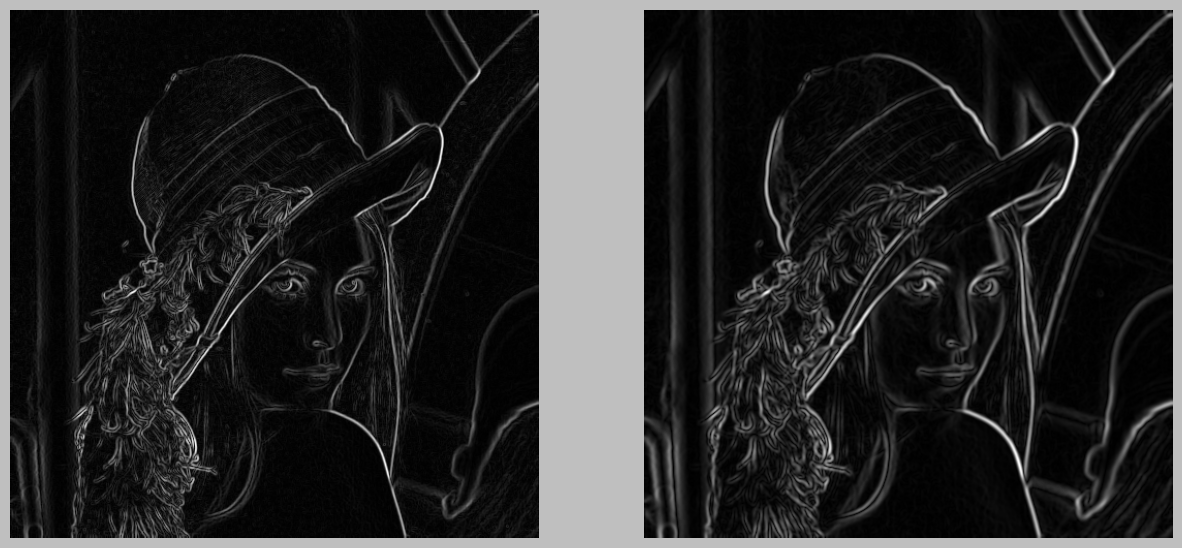

In [132]:
# Lena, sobel 적용 후 magnitude로 에지 추출
import cv2
import numpy as np

src = cv2.imread('./image/lena.jpg', 0)

gx = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gy = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
gx1 = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=9)
gy1 = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=9)

mag = cv2.magnitude(gx, gy)
mag1 = cv2.magnitude(gx1, gy1)

dstM = cv2.normalize(mag, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
dstM1 = cv2.normalize(mag1, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    
plt.style.use("grayscale")
plt.figure(figsize=(15,30)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(dstM)
ax2.imshow(dstM1)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("")
ax2.set_title("")

# cv2.imshow('src', src)
# cv2.imshow('dstM', dstM)
# cv2.imshow('dstM1', dstM1)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

Text(0.5, 1.0, '(360, 360)')

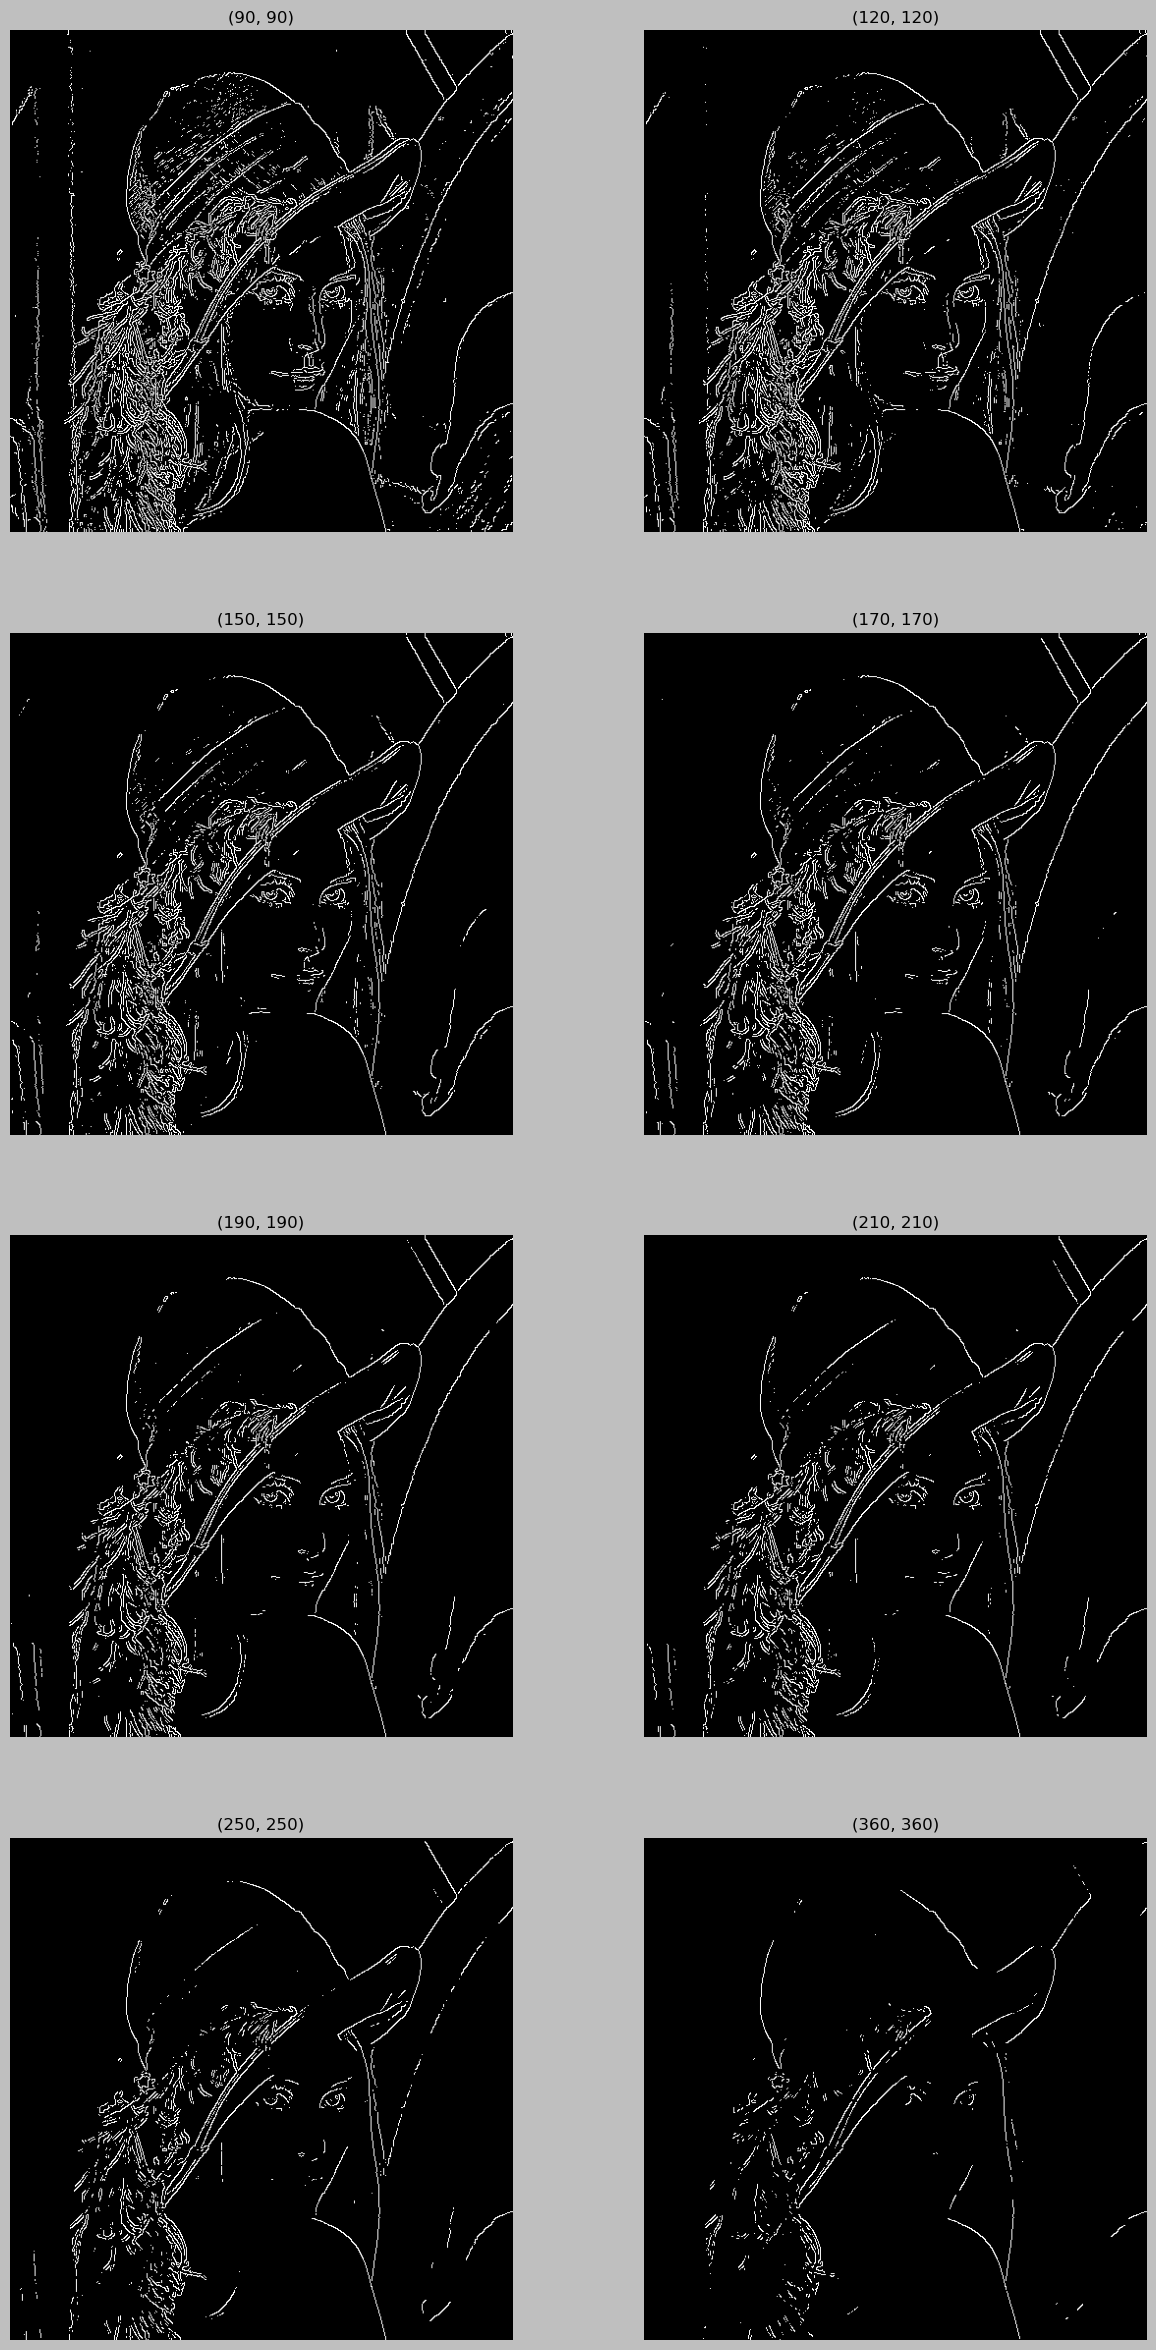

In [151]:
src = cv2.imread('./image/lena.jpg', 0)

dst1 = cv2.Canny(src, 90, 90)
dst2 = cv2.Canny(src, 120, 120)
dst3 = cv2.Canny(src, 150, 150)
dst4 = cv2.Canny(src, 170, 170)
dst5 = cv2.Canny(src, 190, 190)
dst6 = cv2.Canny(src, 210, 210)
dst7 = cv2.Canny(src, 250, 250)
dst8 = cv2.Canny(src, 360, 360)

plt.style.use("grayscale")
plt.figure(figsize=(15,30)) #width, height

ax1 = plt.subplot(4,2,1)
ax2 = plt.subplot(4,2,2)
ax3 = plt.subplot(4,2,3)
ax4 = plt.subplot(4,2,4)
ax5 = plt.subplot(4,2,5)
ax6 = plt.subplot(4,2,6)
ax7 = plt.subplot(4,2,7)
ax8 = plt.subplot(4,2,8)

ax1.imshow(dst1)
ax2.imshow(dst2)
ax3.imshow(dst3)
ax4.imshow(dst4)
ax5.imshow(dst5)
ax6.imshow(dst6)
ax7.imshow(dst7)
ax8.imshow(dst8)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')
ax8.axis('off')

ax1.set_title("(90, 90)") 
ax2.set_title("(120, 120)") 
ax3.set_title("(150, 150)") 
ax4.set_title("(170, 170)") 
ax5.set_title("(190, 190)") 
ax6.set_title("(210, 210)") 
ax7.set_title("(250, 250)") 
ax8.set_title("(360, 360)") 


# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

In [ ]:
# window 구동

import cv2
import numpy as np

def onChange(x) :
    pass

def edge_detection2():
    src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)
    cv2.namedWindow('edge detection')
    
    cv2.createTrackbar('Low threshold', 'edge detection', 0, 255, onChange)
    cv2.createTrackbar('High threshold', 'edge detection', 0, 255, onChange)
    cv2.imshow("edge detection", src)
    
    while True :
        k = cv2.waitKey(0) & 0xFF
        
        if k == 27 :
            break
        
        low = cv2.getTrackbarPos('Low threshold', "edge detection")
        high = cv2.getTrackbarPos('High threshold', "edge detection")
        
        if low > high :
            print('Low threshold must be low than high threshold')
        elif ((low == 0) and (high == 0)) :
            cv2.imshow('edge detection', src)
        else :
            canny = cv2.Canny(src, low, high)
            cv2.imshow('edge detection', canny)
            
    cv2.destroyAllWindows()
    
edge_detection2()

# HoughLines() 직선 검출
> Houghlines() <br>
HoughLindesP()

[[[199 296 199 201]]

 [[300 296 300 200]]

 [[200 300 294 300]]

 [[201 199 296 199]]]


Text(0.5, 1.0, '(120, 120)')

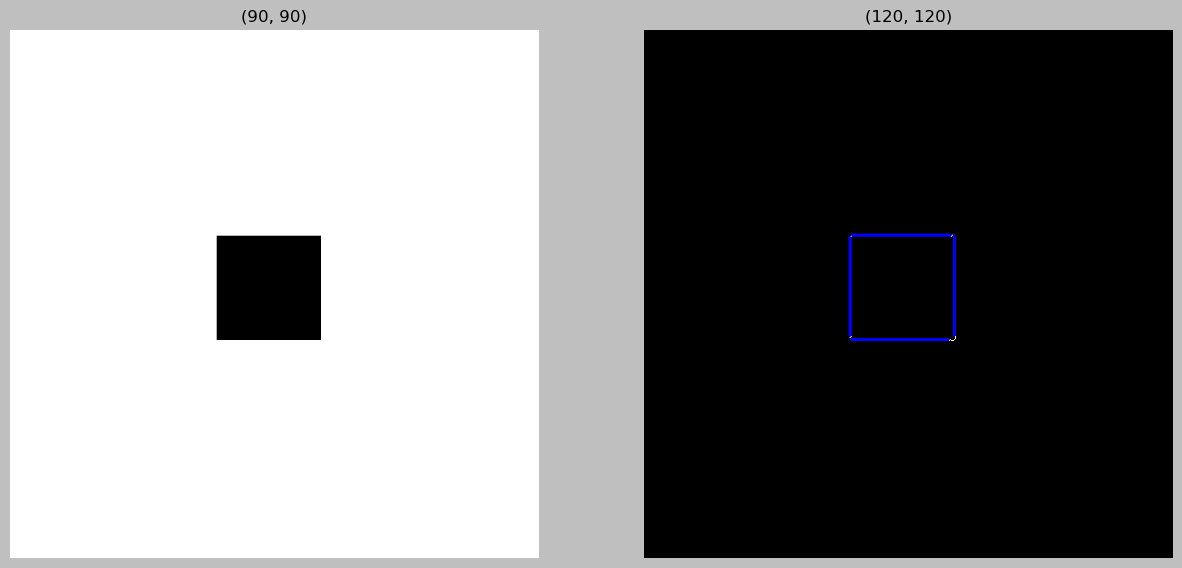

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('./image/rect.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.Canny(src, 200, 200)
lines = cv2.HoughLinesP(dst, rho=1, theta=np.pi/180.0, threshold=50)
print(lines)
dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.style.use("grayscale")
plt.figure(figsize=(15,30)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(src)
ax2.imshow(dst)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("(90, 90)") 
ax2.set_title("(120, 120)") 



# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

[[[231 246 241 236]]

 [[166 274 167 273]]

 [[247 227 261 214]]

 ...

 [[138 259 138 259]]

 [[155 483 155 484]]

 [[215 331 215 305]]]


Text(0.5, 1.0, '(120, 120)')

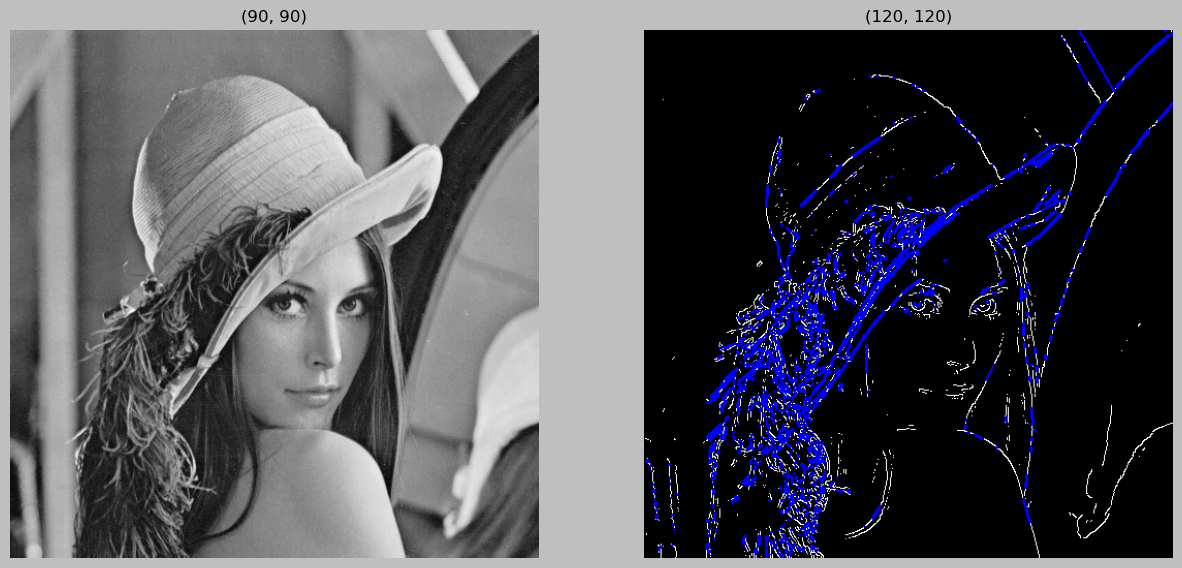

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('./image/lena.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.Canny(src, 170, 170)
lines = cv2.HoughLinesP(dst, rho=1, theta=np.pi/180.0, threshold=50)
print(lines)
dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.style.use("grayscale")
plt.figure(figsize=(15,30)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(src)
ax2.imshow(dst)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("(90, 90)") 
ax2.set_title("(120, 120)") 



# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

# HoughCircles() 원 검출


[[[250.5 251.5  68.5]
  [400.5 168.5  60.6]
  [348.5 399.5  48.5]]]
250 252 68
400 168 61
348 400 48


Text(0.5, 1.0, '')

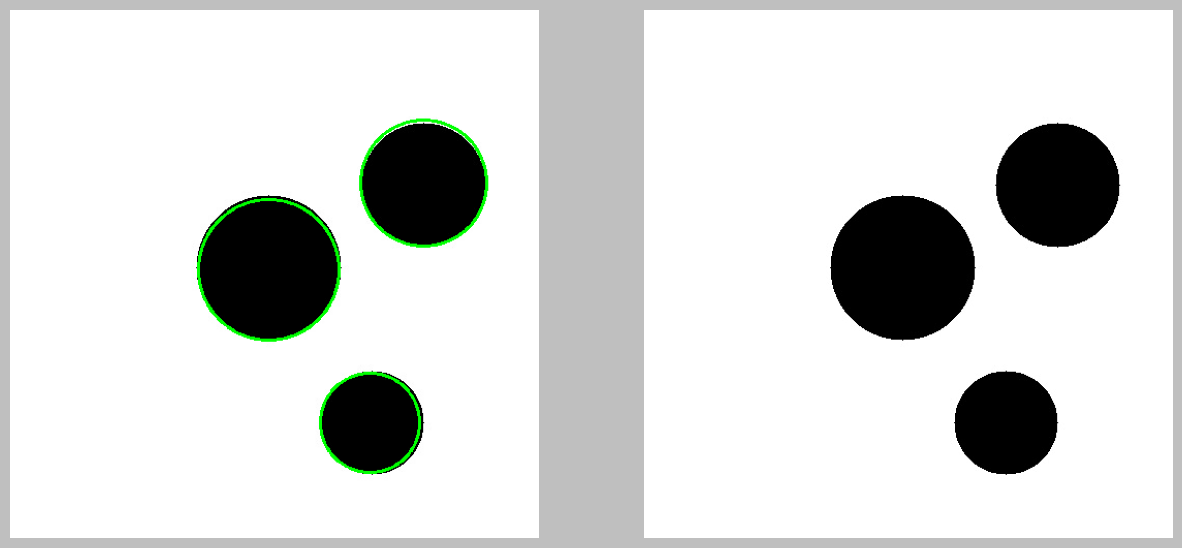

In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('./image/circles.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

circle = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param2=15)
print(circle)
# dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

circles = np.uint16(np.around(circle))
for c in circles[0, :]:
    cx, cy, r = c
    print(cx, cy, r)
    cv2.circle(src, (cx, cy), r, (0,255,0), 2)

plt.style.use("grayscale")
plt.figure(figsize=(15,15)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(src)
ax2.imshow(gray)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("") 
ax2.set_title("") 



# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

[[[265.5 254.5  99.4]]]
266 254 99


Text(0.5, 1.0, '')

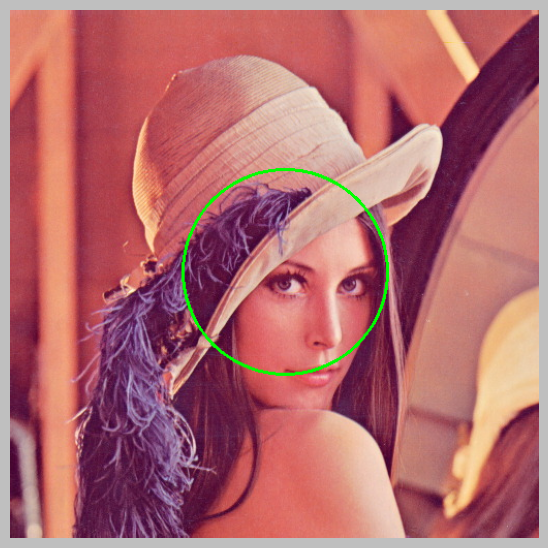

In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('./image/lena.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
dst = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

circle = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=500, 
                          param1=50,param2=30,minRadius=50,maxRadius=100)
print(circle)
# dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

circles = np.uint16(np.around(circle))
for c in circles[0, :]:
    cx, cy, r = c
    print(cx, cy, r)
    cv2.circle(dst, (cx, cy), r, (0,255,0), 2)

plt.style.use("grayscale")
plt.figure(figsize=(15,15)) #width, height

ax1 = plt.subplot(1,2,1)

ax1.imshow(dst)

ax1.axis('off')

ax1.set_title("") 

# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

# cornor
> cv2.preCornerDetect()

-1

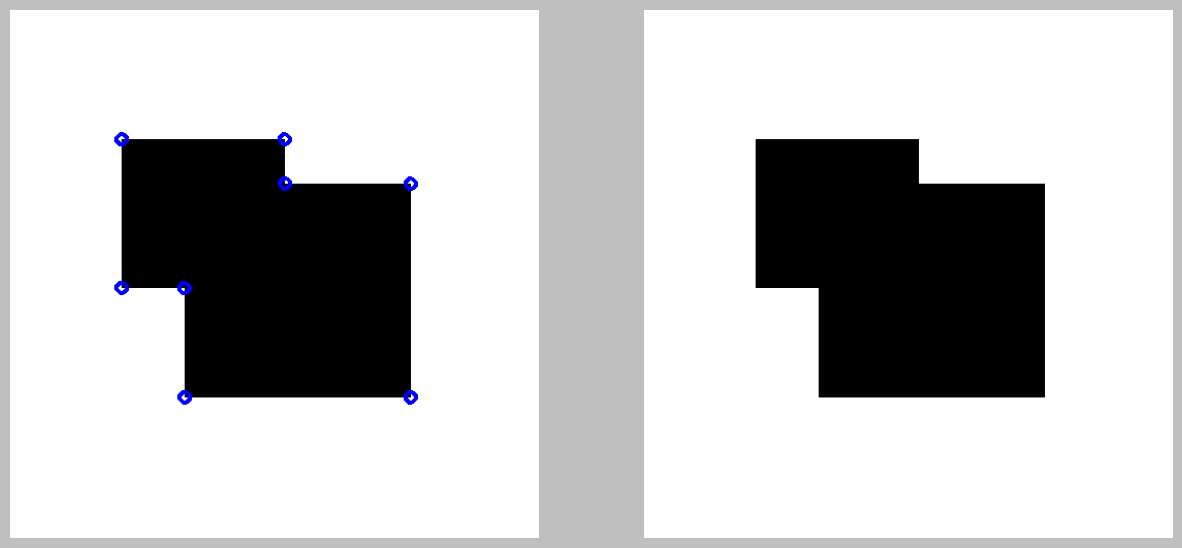

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('./image/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.preCornerDetect(gray, ksize=3)
_, res2 = cv2.threshold(np.abs(res), 0.1, 0, cv2.THRESH_TOZERO)

points = np.argwhere(res2 > 0)

for x,y in points:
    cv2.circle(src, (y, x), 5, (0,0,255), 2)



plt.style.use("grayscale")
plt.figure(figsize=(15,15)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(src)
ax2.imshow(gray)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("")
ax2.set_title("")

cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## findLocalMaxima()
> 자동화 함수

In [18]:
def findLocalMaxima(src):
    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(11,11))
    dilate = cv2.dilate(src, kernel)
    localMax = (src == dilate)
    
    erode = cv2.erode(src, kernel)
    localMax2 = (src > erode)
    localMax &= localMax2
    points = np.argwhere(localMax == True)
    points[:, [0, 1]] = points[:, [1, 0]]
    return points

In [66]:
src = cv2.imread('./image/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.preCornerDetect(gray, ksize=3)
_, res2 = cv2.threshold(np.abs(res), 0.1, 0, cv2.THRESH_TOZERO)

points = findLocalMaxima(res2)
print(np.unique(res2))

dst = src.copy()
for x, y in points:
    r = np.random.randint(0, 255)
    g = np.random.randint(0, 255)
    b = np.random.randint(0, 255)
    cv2.circle(dst, (x, y), 4, (b, g, r), 2) # corners 이용 작은 원 그리기
    
plt.style.use("grayscale")
plt.figure(figsize=(15,15)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(src)
ax2.imshow(dst)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("")
ax2.set_title("")   
    
    
# cv2.imshow('src', gray)
# cv2.imshow('res2', res2)
# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

[0.         0.18627355 0.18651575 0.1867647  0.1872549  0.18749999
 0.18774031 0.18946366 1.1191252  1.1220559  1.1227951  1.125     ]


Text(0.5, 1.0, '')

# cornerMinEigenVal()

eigen.shape= (512, 512)
len(corners)= 8


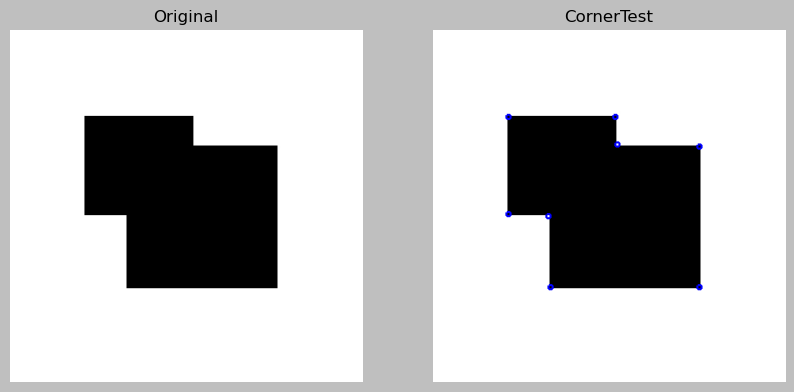

In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('./image/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# eigen value를 구하여 임계값 보다 큰 값 반환(코너 값)
eigen = cv2.cornerMinEigenVal(gray, blockSize=5)
print('eigen.shape=',eigen.shape)


# eigen 밝기값 분포 확인 eigen이 특정값을 초과하는 좌표 구하기
corners = np.argwhere(eigen > 0.2)
corners[:, [0,1]] = corners[:,[1,0]]
print('len(corners)=',len(corners))


#원본 영상 카피하여 위의 좌표를 빨간색 점으로 출력
dst = src.copy()
for x,y in corners :
    cv2.circle(dst, (x,y), 3, (0,0,255), 2)

plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src, cmap="gray")

imgae2=plt.subplot(1,2,2)
imgae2.set_title('CornerTest')
plt.axis('off')
plt.imshow(dst, cmap="gray")

plt.show()
    
# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

eigen.shape= (512, 512)
[5.0092785e-07 5.7663419e-07 6.7404653e-07 ... 4.6648271e-02 4.6998546e-02
 5.6870822e-02]
len(corners)= 1541


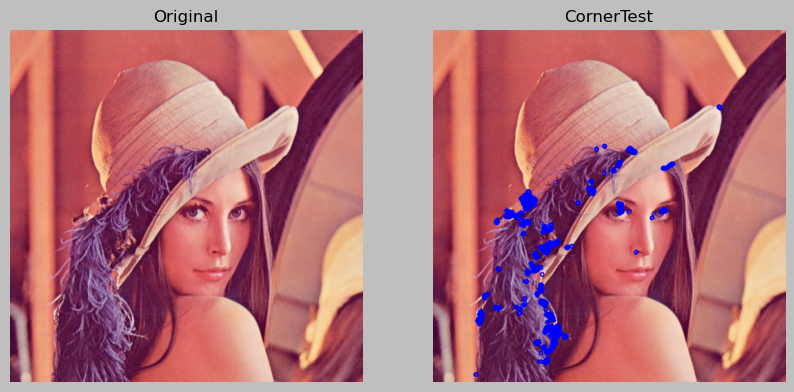

In [63]:
src = cv2.imread('./image/lena.jpg')
src2 = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src2, cv2.COLOR_RGB2GRAY)

eigen = cv2.cornerMinEigenVal(gray,blockSize=5)
print('eigen.shape=',eigen.shape)
print(np.unique(eigen))

T = 0.01
corners = np.argwhere(eigen > T)
corners[:,[0,1]] = corners[:,[1,0]]
print('len(corners)=',len(corners))

dst = src2.copy()
for x,y, in corners:
    cv2.circle(dst,(x,y),3,(0,0,255),1)
    
plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src2, cmap="gray")

imgae2=plt.subplot(1,2,2)
imgae2.set_title('CornerTest')
plt.axis('off')
plt.imshow(dst, cmap="gray")

plt.show()

# cornerHarris()

Text(0.5, 1.0, 'dst')

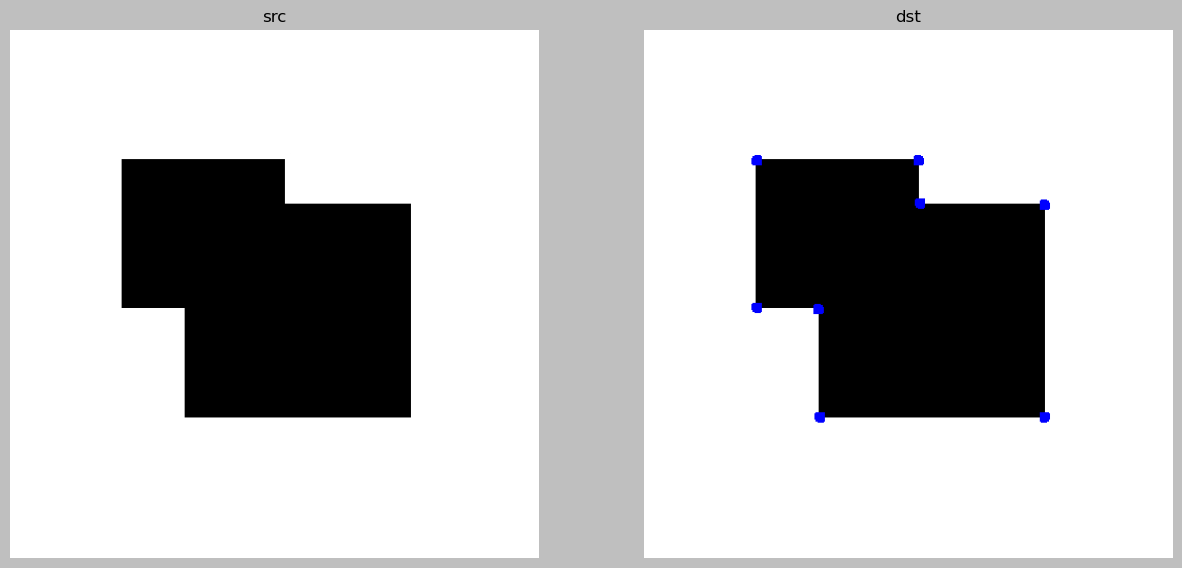

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('./image/CornerTest.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,10,3,0.04)

img[dst > 0.02 * dst.max()] = [0,0,255]


plt.style.use("grayscale")
plt.figure(figsize=(15,15)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(gray)
ax2.imshow(img)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("src")
ax2.set_title("dst")

In [19]:
src = cv2.imread('./image/CornerTest.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.cornerHarris(gray, blockSize=5, ksize=3, k=0.01) # 해리스에서 지정하는 k 상수
ret, res2 = cv2.threshold(np.abs(res), 0.005, 0, cv2.THRESH_TOZERO) # 임계값 0.02 기준, res 절대값 낮으면 0, 높으면 원래 값
corners = findLocalMaxima(res2) # 위 함수에 적용, 로컬 맥시마 위치 저장

print('corners =', corners) # 코너 좌표 출력
dst = src.copy()
for x, y in corners:
    cv2.circle(dst, (x, y), 3, (0, 0, 255), 2)
    
cv2.imshow('cornerHarris', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

corners = [[109 127]
 [264 127]
 [267 167]
 [386 170]
 [109 268]
 [167 271]
 [170 374]
 [386 374]]


-1

# FAST 코너 검출 방법

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('./image/seaport.jpeg')
# gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)

T = 50
fast = cv2.FastFeatureDetector_create(T)
fast.setNonmaxSuppression(0)
kp = fast.detect(src, None)
dst = src.copy()
cv2.drawKeypoints(src, kp, dst, (255,0,0))


plt.style.use("grayscale")
plt.figure(figsize=(15,15)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(src)
ax2.imshow(dst)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("src")
ax2.set_title("dst")

# cv2.imshow('cornerHarris', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

Text(0.5, 1.0, 'dst')

# 체스보드 코너
# findChessboardCorners()

corners.shape = (18, 1, 2)


Text(0.5, 1.0, 'dst')

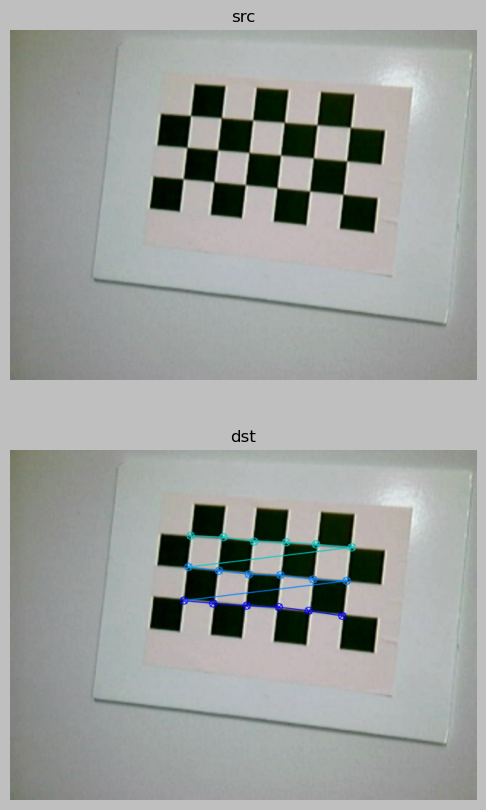

In [75]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# findChessboardCorners with ChessBoard.jpg
src = cv2.imread('./image/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

patternSize = (6, 3) # 가로 6개 세로 3개
found, corners = cv2.findChessboardCorners(gray, patternSize)
print('corners.shape =', corners.shape)

dst = src.copy()
cv2.drawChessboardCorners(dst, patternSize, corners, found)

plt.style.use("grayscale")
plt.figure(figsize=(10,10)) #width, height

ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

ax1.imshow(src)
ax2.imshow(dst)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("src")
ax2.set_title("dst")

# cv2.imshow('Chessboard', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

# findCirclesGrid()

corners.shape = (24, 1, 2)


libpng warning: bKGD: invalid


Text(0.5, 1.0, 'dst')

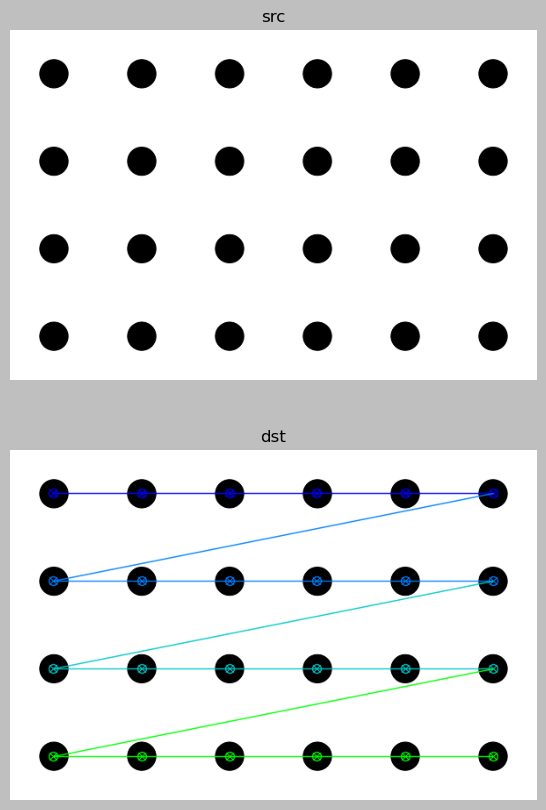

In [76]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# findChessboardCorners with ChessBoard.jpg
src = cv2.imread('./image/circleGrid.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

patternSize = (6, 4) 
found, corners = cv2.findCirclesGrid(gray, patternSize)
print('corners.shape =', corners.shape)

dst = src.copy()
cv2.drawChessboardCorners(dst, patternSize, corners, found)

plt.style.use("grayscale")
plt.figure(figsize=(10,10)) #width, height

ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

ax1.imshow(src)
ax2.imshow(dst)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("src")
ax2.set_title("dst")

# cv2.imshow('Chessboard', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

# Moment

Text(0.5, 1.0, 'cnt')

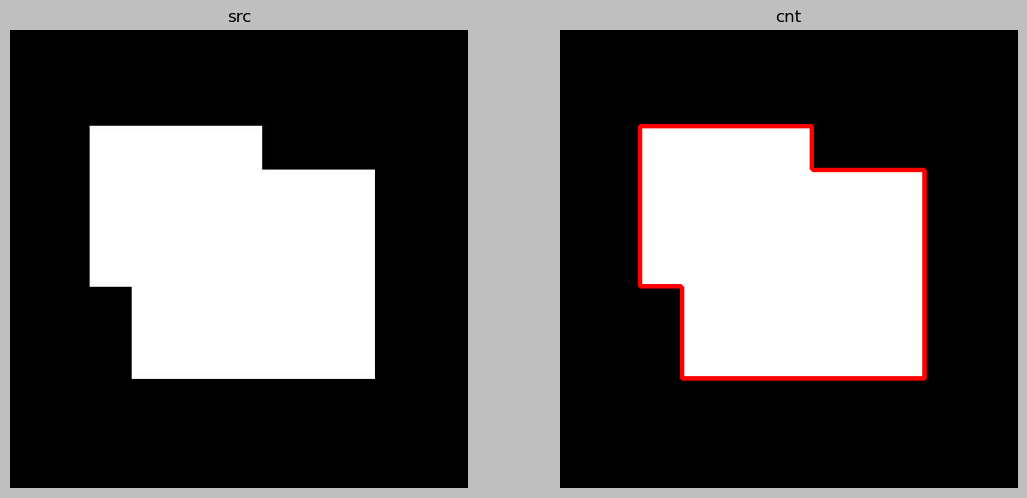

In [118]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('./image/momentTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, blmage = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

mode = cv2.RETR_EXTERNAL
methos = cv2.CHAIN_APPROX_SIMPLE
contours, _ = cv2.findContours(blmage, mode, methos)

dst = src.copy()
cnt = contours[0]

cv2.drawContours(dst, [cnt], 0, (255,0,0), 3)

plt.style.use("grayscale")
plt.figure(figsize=(13,8)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(src)
ax2.imshow(dst)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("src")
ax2.set_title("cnt")

# cv2.imshow('cnt', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

hu.shape = (7, 1)
hu= [[ 1.72272960e-01]
 [ 2.17960438e-03]
 [ 9.24428655e-05]
 [ 1.90785217e-06]
 [ 1.11977849e-12]
 [-6.96325160e-09]
 [-2.53121609e-11]]


Text(0.5, 1.0, 'cnt')

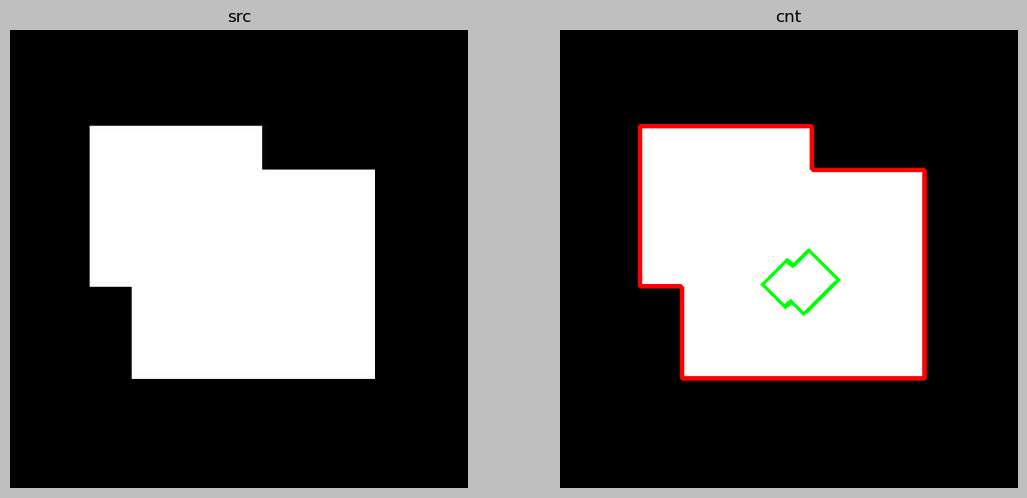

In [119]:
M = cv2.moments(cnt) # 모멘트 구함
hu = cv2.HuMoments(M)
print('hu.shape =', hu.shape)
print('hu=', hu)

# Humomment의 회전,사이즈 변경 invaiant 검증
angle = 45.0 #원본 영상 45도 회전
scale = 0.2 #사이즈 20%로 변경

cx = M['m10']/M['m00']
cy = M['m01']/M['m00']

center = (cx, cy)
t = (20, 30) # 이동량

A = cv2.getRotationMatrix2D(center, angle, scale)
A[:, 2] += t #translation
cnt2 = cv2.transform(cnt, A) # 변경 적용
cv2.drawContours(dst, [cnt2], 0, (0,255,0), 3)

plt.style.use("grayscale")
plt.figure(figsize=(13,8)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(src)
ax2.imshow(dst)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("src")
ax2.set_title("cnt")

# cv2.imshow('cnt', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)

# refernce source를 이용하여 test source에서 찾아본다.

Text(0.5, 1.0, 'test')

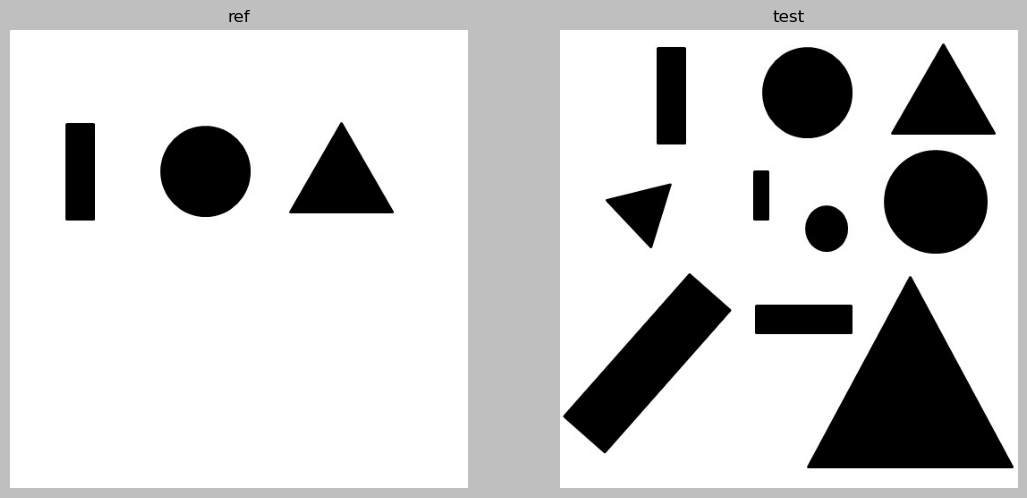

In [93]:
ref_src = cv2.imread('./image/refShapes.jpg')
test_src = cv2.imread('./image/testShapes.jpg')

plt.style.use("grayscale")
plt.figure(figsize=(13,8)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(ref_src)
ax2.imshow(test_src)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("ref")
ax2.set_title("test")

Text(0.5, 1.0, 'test')

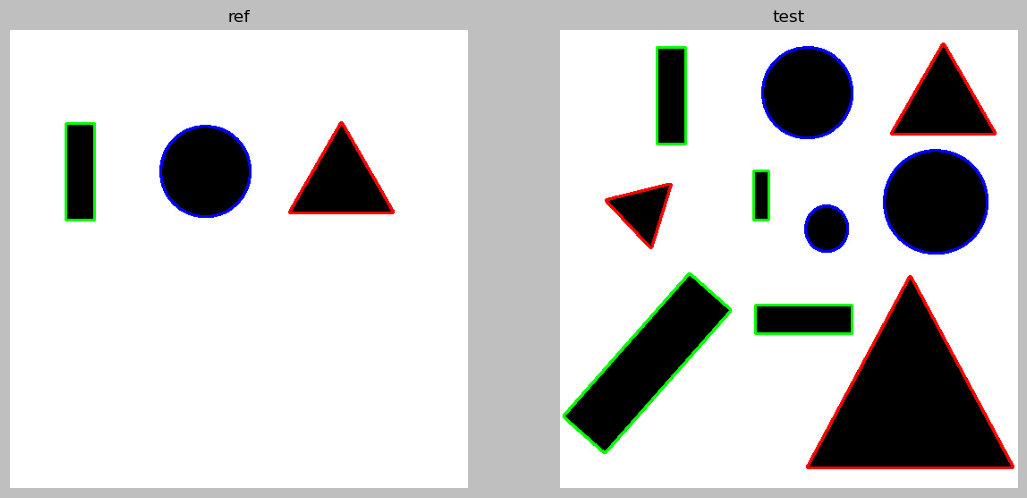

In [123]:
import cv2
import numpy as np

ref_src = cv2.imread('./image/refShapes.jpg')
ref_gray = cv2.cvtColor(ref_src, cv2.COLOR_BGR2GRAY)
ret, ref_bin = cv2.threshold(ref_gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

test_src = cv2.imread('./image/testShapes.jpg')
test_gray = cv2.cvtColor(test_src, cv2.COLOR_BGR2GRAY)
ret, test_bin = cv2.threshold(test_gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
ref_contours, _ = cv2.findContours(ref_bin, mode, method)
test_contours, _ = cv2.findContours(test_bin, mode, method)

ref_dst = ref_src.copy()
colors = ((0,0,255), (0,255,0), (255,0,0))

for i, cnt in enumerate(ref_contours):
    cv2.drawContours(ref_dst, [cnt], 0, colors[i], 2)
    
test_dst = test_src.copy()
method = cv2.CONTOURS_MATCH_I1

for i, cnt1 in enumerate(test_contours):
    matches = []
    for cnt2 in ref_contours:
        ret = cv2.matchShapes(cnt1, cnt2, method, 0)
        matches.append(ret)
    k = np.argmin(matches)
    cv2.drawContours(test_dst, [cnt1], 0, colors[k], 2)
    
    
    
plt.style.use("grayscale")
plt.figure(figsize=(13,8)) #width, height

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.imshow(ref_dst)
ax2.imshow(test_dst)

ax1.axis('off')
ax2.axis('off')

ax1.set_title("ref")
ax2.set_title("test")
    
    
# cv2.imshow('reference', ref_dst)
# cv2.imshow('test', test_dst)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)
# cv2.waitKey(1)
